# Library

In [79]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [57]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+01:00                     0.0                    0.0   
2015-01-01 01:00:00+01:00                     0.0                    0.0   
2015-01-01 02:00:00+01:00                     0.0                    0.0   
2015-01-01 03:00:00+01:00                     0.0                    0.0   
2015-01-01 04:00:00+01:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+01:00                                         NaN  ...   
2015-01-01 01:00:00+01:00                                         NaN  ...   
2015-01-01 02:00:00+01:00                                         NaN  ...   
2015-01-01 03:00:00+01:00                                         NaN  ...   
2015-01-01 04:00:00+01:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+01:00             196.0                       0.0   
2015-01-01 01:00:00+01:00             195.0                       0.0   
2015-01-01 02:00:00+01:00             196.0                       0.0   
2015-01-01 03:00:00+01:00             191.0                       0.0   
2015-01-01 04:00:00+01:00             189.0                       0.0   

                           ge

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [59]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [60]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

<AxesSubplot:xlabel='time'>

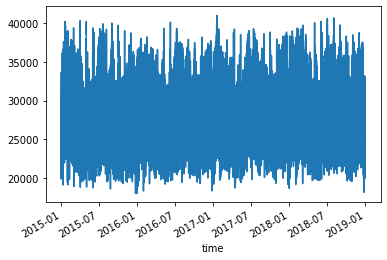

In [61]:
df['total load actual'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total load actual', ylabel='Density'>

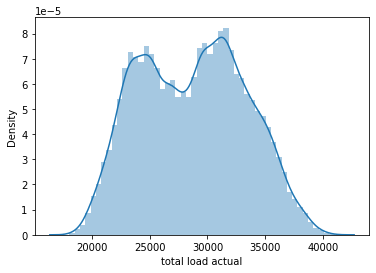

In [62]:
sns.distplot(df['total load actual'])

In [63]:
df.corr()['total load actual']

generation biomass                             0.083288
generation fossil brown coal/lignite           0.280461
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.548913
generation fossil hard coal                    0.396564
generation fossil oil                          0.497089
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption   -0.562809
generation hydro run-of-river and poundage     0.118570
generation hydro water reservoir               0.479481
generation marine                                   NaN
generation nuclear                             0.085664
generation other                               0.100690
generation other renewable                     0.181714
generation solar                               0

In [64]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [66]:
# Data 2

# All
# df_new = df.drop(df.columns[[10, 23, 25, 26]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25, 26]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1)

# Target
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total load actual  35028 non-null  float64
dtypes: float64(1)
memory usage: 547.9+ KB


In [68]:
values = df_new.values

In [69]:
values.shape

(35064, 1)

## Normalisasi

In [70]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [48]:
# Z-score
# scaled = stats.zscore(values, axis = 1)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [71]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [72]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

In [73]:
reframed.shape

(35005, 2)

In [74]:
# Data 2

# All
# reframed.drop(reframed.columns[[x for x in range(25, 48)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(18, 34)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

## Split data

In [188]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [189]:
#design network CNN
model = Sequential()
model.add(Conv1D(filters=69, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

In [190]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/74
351/351 [==============================] - 6s 7ms/step - loss: 0.0443 - val_loss: 0.0409
Epoch 2/74
351/351 [==============================] - 2s 6ms/step - loss: 0.0407 - val_loss: 0.0397
Epoch 3/74
351/351 [==============================] - 2s 6ms/step - loss: 0.0399 - val_loss: 0.0396
Epoch 4/74
351/351 [==============================] - 2s 6ms/step - loss: 0.0397 - val_loss: 0.0396
Epoch 5/74
351/351 [==============================] - 3s 9ms/step - loss: 0.0396 - val_loss: 0.0397
Epoch 6/74
351/351 [==============================] - 2s 7ms/step - loss: 0.0396 - val_loss: 0.0397
Epoch 7/74
351/351 [==============================] - 2s 7ms/step - loss: 0.0396 - val_loss: 0.0396
Epoch 8/74
351/351 [==============================] - 2s 7ms/step - loss: 0.0383 - val_loss: 0.0279
Epoch 9/74
351/351 [==============================] - 2s 7ms/step - loss: 0.0213 - val_loss: 0.0085
Epoch 10/74
351/351 [==============================] - 3s 9ms/step - loss: 0.0166 - val_loss: 0.0083

### Grid Search

In [108]:
#design network CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

In [109]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 0.6583 - val_loss: 0.5877
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5881 - val_loss: 0.5860
Epoch 3/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5861 - val_loss: 0.5855
Epoch 4/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5857 - val_loss: 0.5854
Epoch 5/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5855 - val_loss: 0.5851
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5854 - val_loss: 0.5850
Epoch 7/50
351/351 [==============================] - 1s 3ms/step - loss: 0.5853 - val_loss: 0.5849
Epoch 8/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5851 - val_loss: 0.5852
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5851 - val_loss: 0.5851
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5851 - val_loss: 0.5849

# Evaluasi

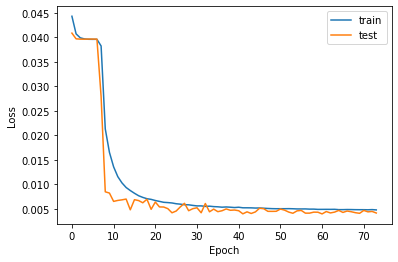

In [191]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [192]:
#membuat prediksi training
xhat = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [193]:
# calculate RMSE
from sklearn.metrics import mean_absolute_percentage_error as mape
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mape(test_y, yhat))}')
print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mape(yhat, test_y))}')
print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

==============minmax===================
MAPE test is : 14856747423.586546
MAPE test invert is : 0.03924317491772078
==============zscore===================
MAPE test is : 0.13498611117081522
MAPE test invert is : 0.04040638074290843
RMSE Testing is : 0.065
RMSE Testing invert is : 1485.970
R2 test is : 0.8944515603226655
R2 test invert is : 0.8944515603226655


Actual : [[0.27600766]
 [0.2042744 ]
 [0.14124663]
 ...
 [0.43658048]
 [0.33777313]
 [0.27918517]]
Predicted: [[0.30968186]
 [0.26765123]
 [0.19221334]
 ...
 [0.4900036 ]
 [0.41733295]
 [0.32703626]]


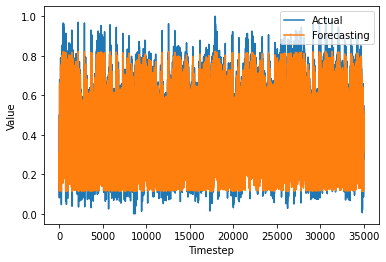

In [194]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

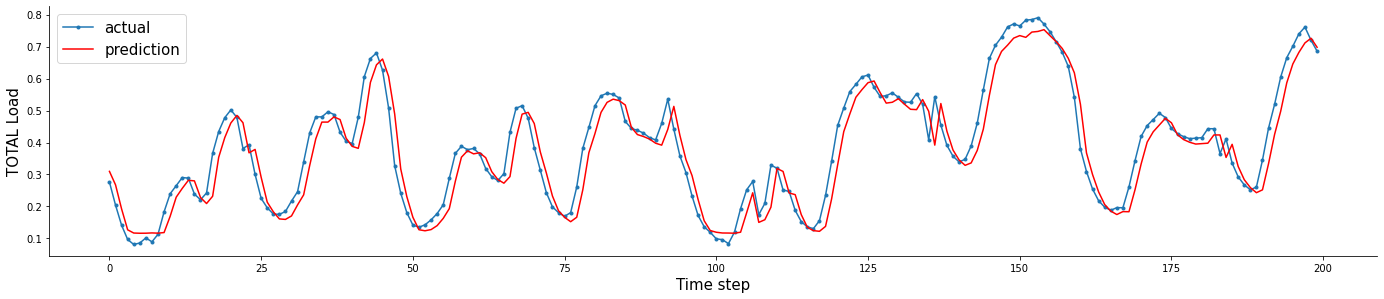

In [195]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 0.6612 - val_loss: 0.5881
Epoch 2/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5891 - val_loss: 0.5859
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5865 - val_loss: 0.5856
Epoch 4/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5856 - val_loss: 0.5852
Epoch 5/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5857 - val_loss: 0.5851
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5855 - val_loss: 0.5853
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5853 - val_loss: 0.5851
Epoch 8/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5853 - val_loss: 0.5851
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5851 - val_loss: 0.5853
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5852 - val_loss: 0.5850

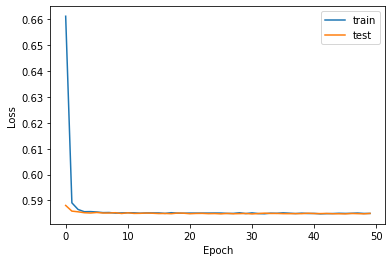

==============minmax===================
MAPE test is : 2.001574883105743
MAPE test invert is : 0.10593509275302151
==============zscore===================
MAPE test is : 1555588744994157.8
MAPE test invert is : 0.09092699061176986
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.095
R2 test is : 0.41474785371853173
R2 test invert is : 0.41474785371853173


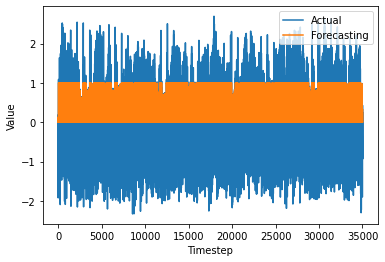

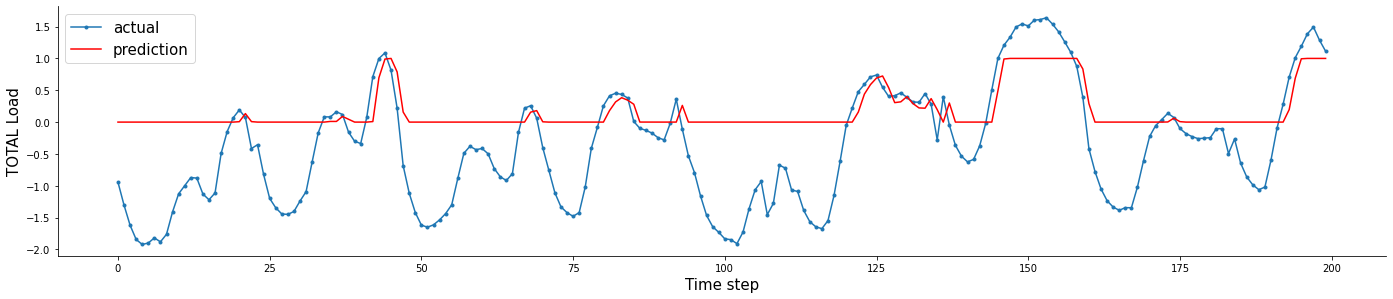

Epoch 1/50
351/351 [==============================] - 4s 9ms/step - loss: 0.6752 - val_loss: 0.5872
Epoch 2/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5879 - val_loss: 0.5854
Epoch 3/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5859 - val_loss: 0.5851
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5855 - val_loss: 0.5853
Epoch 5/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5855 - val_loss: 0.5852
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5854 - val_loss: 0.5849
Epoch 7/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5852 - val_loss: 0.5849
Epoch 8/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 10/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5852 - val_loss: 0.5849

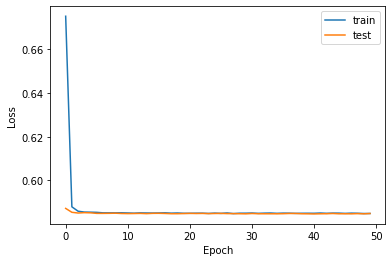

==============minmax===================
MAPE test is : 1.9866661412426505
MAPE test invert is : 0.10592470641543686
==============zscore===================
MAPE test is : 1569470046738135.2
MAPE test invert is : 0.09093807529559164
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.809
R2 test is : 0.4148436337319412
R2 test invert is : 0.414843633731941


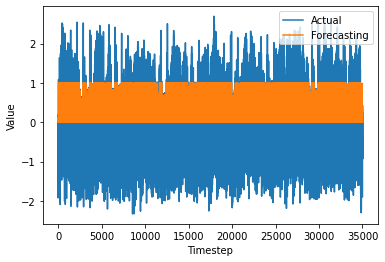

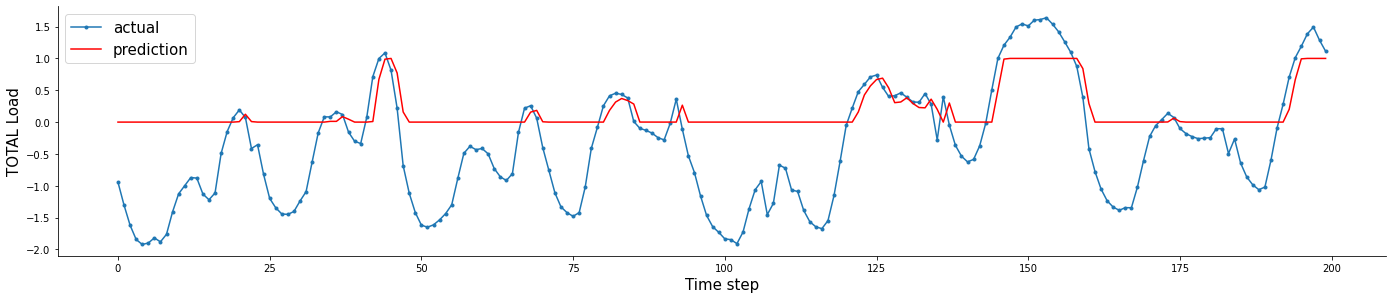

Epoch 1/50
351/351 [==============================] - 4s 6ms/step - loss: 0.6590 - val_loss: 0.5869
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5873 - val_loss: 0.5854
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5860 - val_loss: 0.5854
Epoch 4/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5857 - val_loss: 0.5849
Epoch 5/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5853 - val_loss: 0.5850
Epoch 6/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5854 - val_loss: 0.5849
Epoch 7/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5854 - val_loss: 0.5849
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5853 - val_loss: 0.5848
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5850 - val_loss: 0.5849
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5851 - val_loss: 0.5849

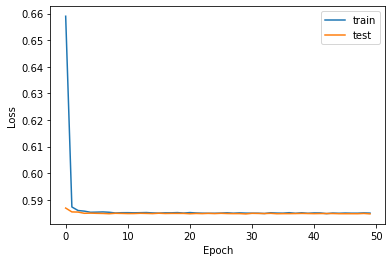

==============minmax===================
MAPE test is : 2.0285730088821134
MAPE test invert is : 0.10587194017928846
==============zscore===================
MAPE test is : 1562960414270375.2
MAPE test invert is : 0.09088345729635575
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.272
R2 test is : 0.4150230557575936
R2 test invert is : 0.4150230557575937


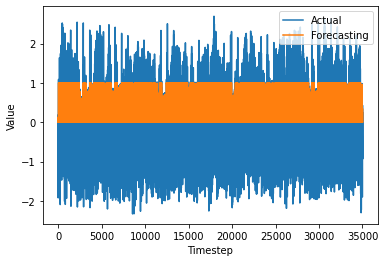

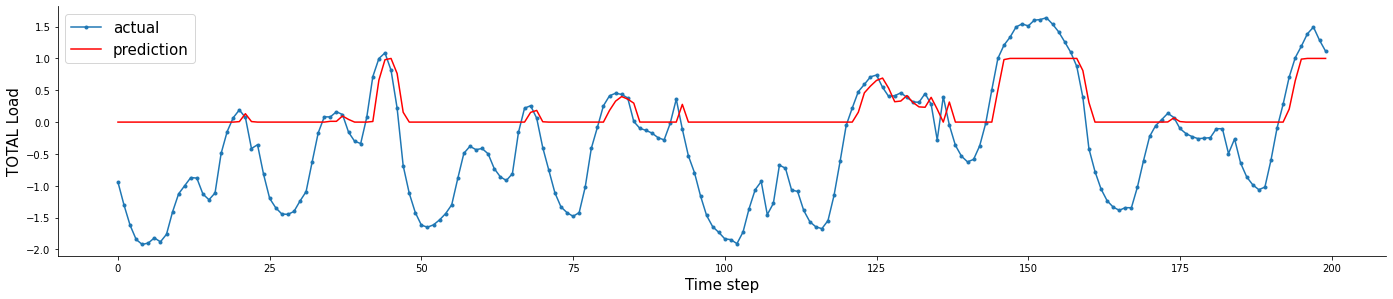

Epoch 1/50
351/351 [==============================] - 4s 6ms/step - loss: 0.6659 - val_loss: 0.5873
Epoch 2/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5882 - val_loss: 0.5855
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5862 - val_loss: 0.5853
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5856 - val_loss: 0.5850
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5856 - val_loss: 0.5850
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5853 - val_loss: 0.5849
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5852 - val_loss: 0.5848
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5854 - val_loss: 0.5849
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5853 - val_loss: 0.5849
Epoch 10/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5853 - val_loss: 0.5849

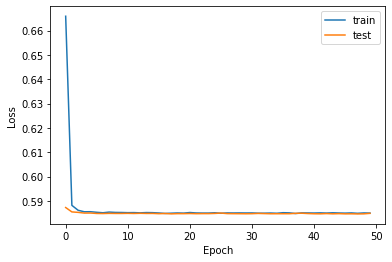

==============minmax===================
MAPE test is : 1.9840501055405626
MAPE test invert is : 0.10593813427889402
==============zscore===================
MAPE test is : 1503048644225751.2
MAPE test invert is : 0.09096994186983039
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.900
R2 test is : 0.41481297378056914
R2 test invert is : 0.41481297378056914


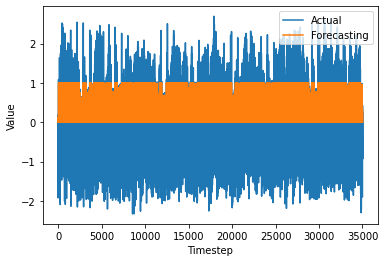

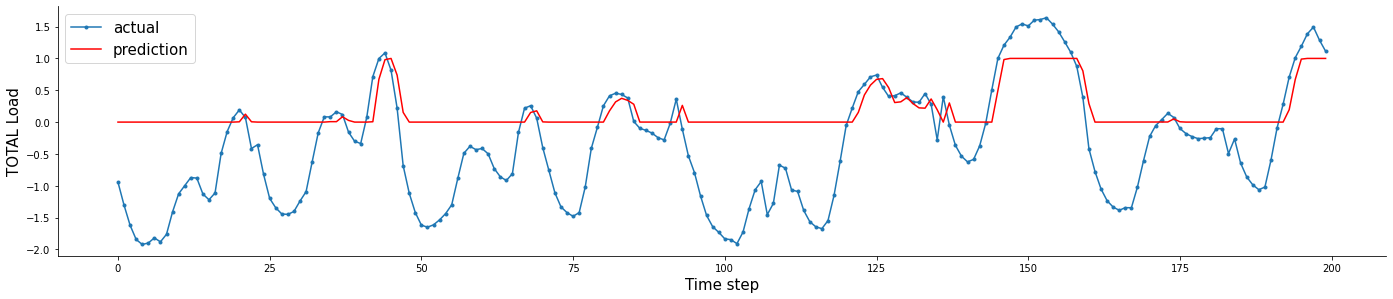

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 0.6839 - val_loss: 0.5875
Epoch 2/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5883 - val_loss: 0.5858
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5862 - val_loss: 0.5853
Epoch 4/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5858 - val_loss: 0.5851
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5856 - val_loss: 0.5850
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5854 - val_loss: 0.5852
Epoch 7/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5854 - val_loss: 0.5851
Epoch 8/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5853 - val_loss: 0.5850
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5853 - val_loss: 0.5850
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5852 - val_loss: 0.5850

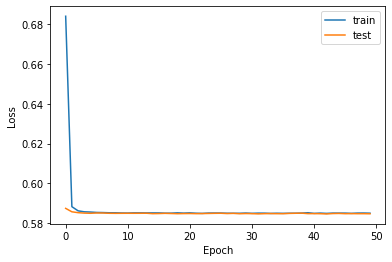

==============minmax===================
MAPE test is : 2.033959999584636
MAPE test invert is : 0.10588819301835603
==============zscore===================
MAPE test is : 1569451521736190.2
MAPE test invert is : 0.09090688912352884
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.445
R2 test is : 0.41496542777240897
R2 test invert is : 0.41496542777240897


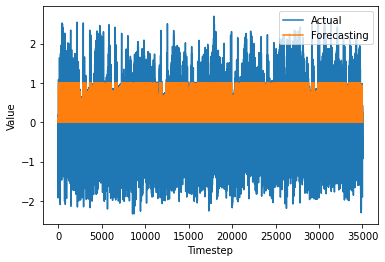

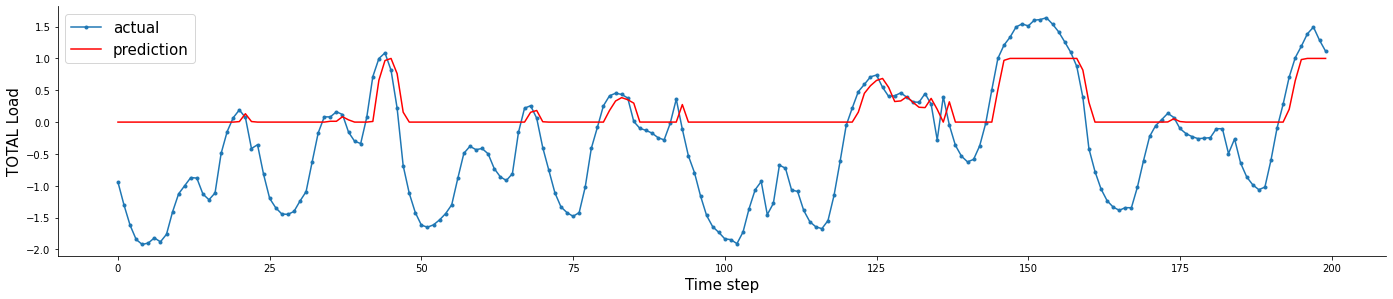

In [53]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

## tanh minmax

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 0.0150 - val_loss: 0.0075
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 4/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 5/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0067
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 8/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0048 - val_loss: 0.0072
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0062

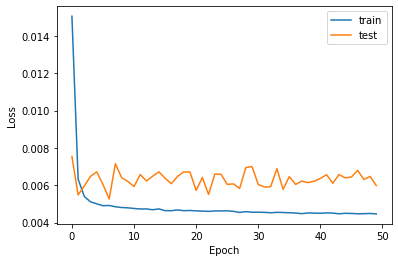

==============minmax===================
MAPE test is : 13443460245.487698
MAPE test invert is : 0.04776470805268974
==============zscore===================
MAPE test is : 0.15891200066811656
MAPE test invert is : 0.0504840773984714
RMSE Testing is : 0.077
RMSE Testing invert is : 1776.578
R2 test is : 0.8491309426726525
R2 test invert is : 0.8491309426726525


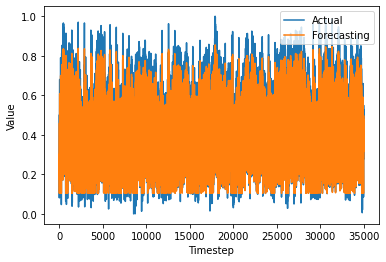

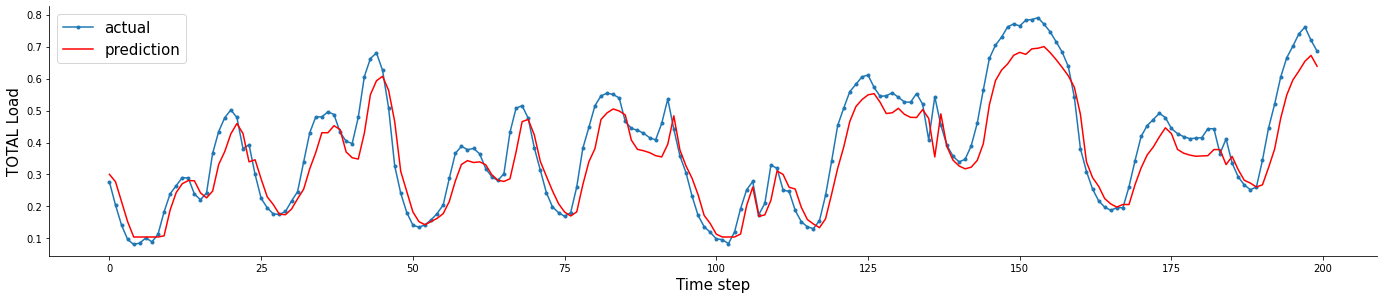

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.0151 - val_loss: 0.0054
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 6/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0063
Epoch 8/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 10/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0048 - val_loss: 0.0073

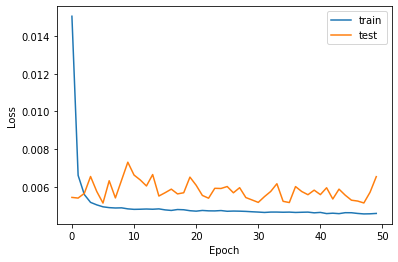

==============minmax===================
MAPE test is : 5981777014.126717
MAPE test invert is : 0.04992660646442365
==============zscore===================
MAPE test is : 0.1663364973816803
MAPE test invert is : 0.05305304727217143
RMSE Testing is : 0.081
RMSE Testing invert is : 1857.683
R2 test is : 0.8350414353116369
R2 test invert is : 0.8350414353116369


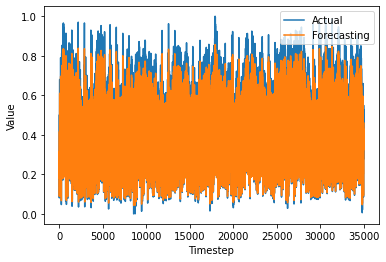

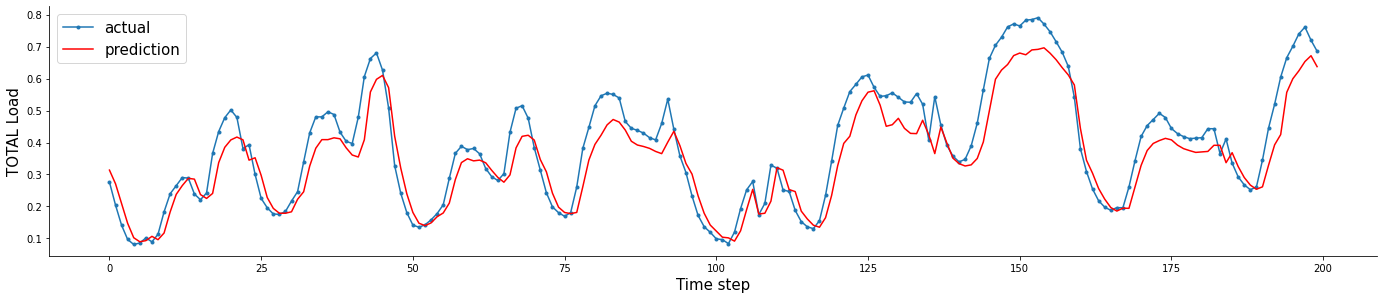

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.0158 - val_loss: 0.0083
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0055 - val_loss: 0.0070
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0078
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0072
Epoch 8/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0049 - val_loss: 0.0078
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0048 - val_loss: 0.0076
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0075

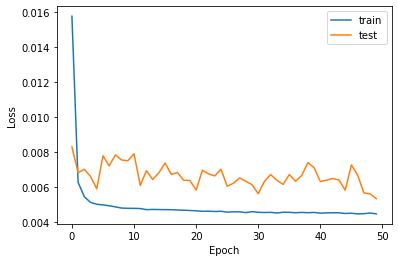

==============minmax===================
MAPE test is : 9867710943.308264
MAPE test invert is : 0.04560441971570483
==============zscore===================
MAPE test is : 0.14988713497199574
MAPE test invert is : 0.047755809222057286
RMSE Testing is : 0.073
RMSE Testing invert is : 1679.605
R2 test is : 0.8651515226892172
R2 test invert is : 0.8651515226892172


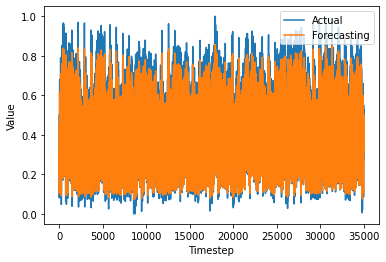

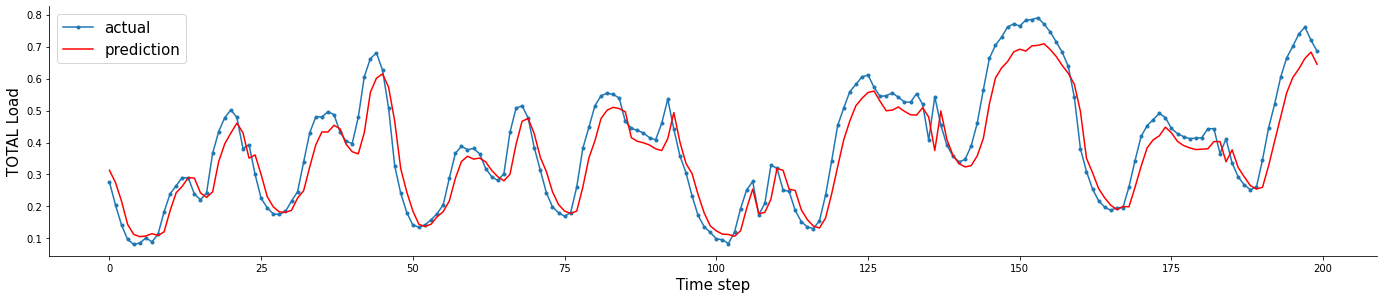

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.0146 - val_loss: 0.0082
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 3/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 5/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0066
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0048 - val_loss: 0.0067
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0047 - val_loss: 0.0064

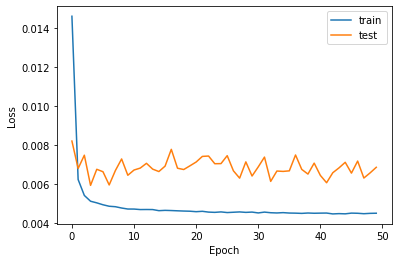

==============minmax===================
MAPE test is : 4960675053.3036175
MAPE test invert is : 0.05087058517239845
==============zscore===================
MAPE test is : 0.16668109052828706
MAPE test invert is : 0.053994973447339105
RMSE Testing is : 0.083
RMSE Testing invert is : 1902.118
R2 test is : 0.8270556953755724
R2 test invert is : 0.8270556953755723


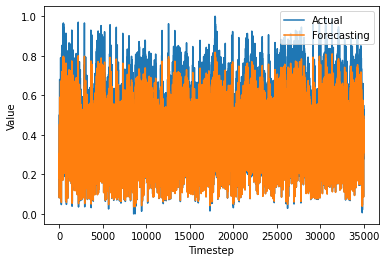

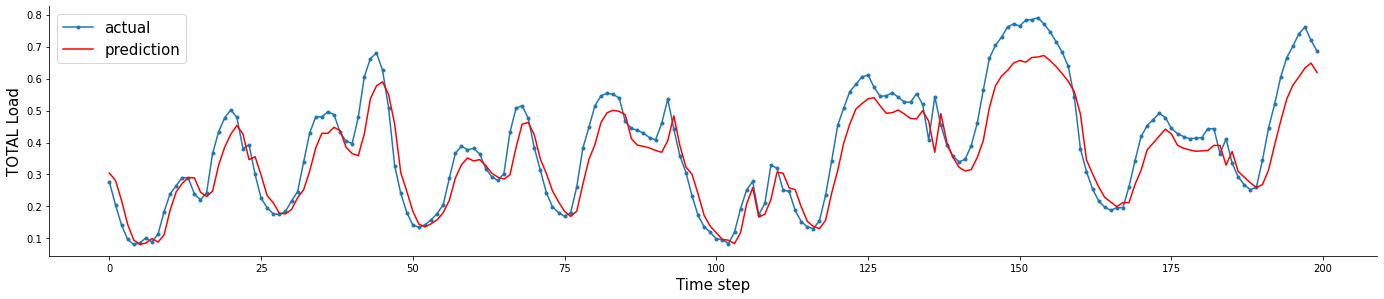

Epoch 1/50
351/351 [==============================] - 3s 6ms/step - loss: 0.0152 - val_loss: 0.0057
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0052 - val_loss: 0.0068
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0061
Epoch 7/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0061
Epoch 8/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0048 - val_loss: 0.0061
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0047 - val_loss: 0.0056

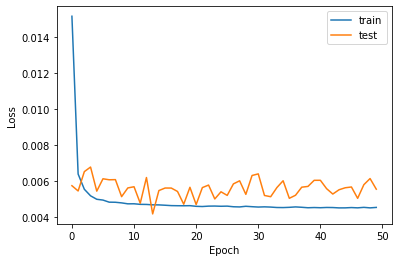

==============minmax===================
MAPE test is : 5469738107.2051525
MAPE test invert is : 0.04532099416799079
==============zscore===================
MAPE test is : 0.15479121378792557
MAPE test invert is : 0.04797375097140609
RMSE Testing is : 0.075
RMSE Testing invert is : 1712.380
R2 test is : 0.859837564750668
R2 test invert is : 0.8598375647506679


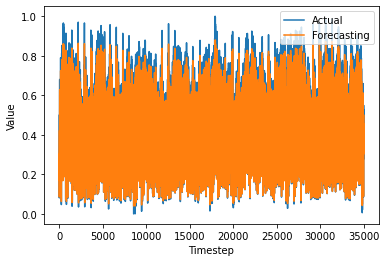

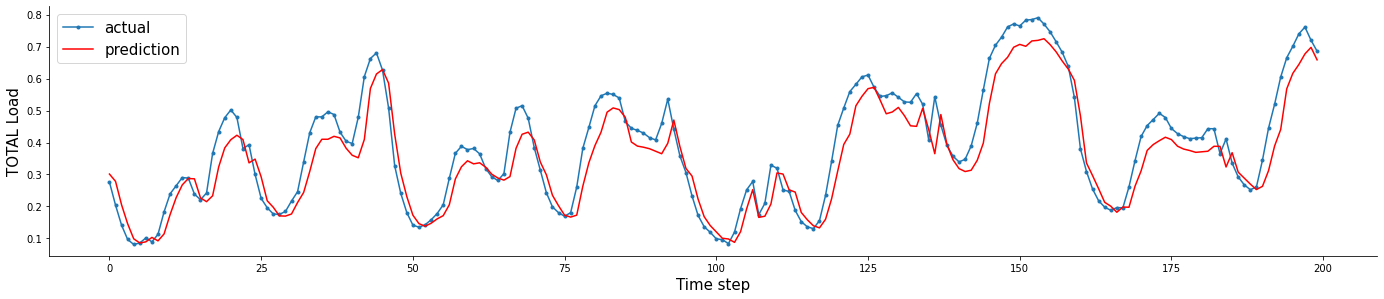

In [75]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')

  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

## sig minmax

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.0441 - val_loss: 0.0392
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0410 - val_loss: 0.0384
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0389 - val_loss: 0.0357
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0346 - val_loss: 0.0264
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0269 - val_loss: 0.0140
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0206 - val_loss: 0.0083
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0166 - val_loss: 0.0071
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0138 - val_loss: 0.0056
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0121 - val_loss: 0.0054
Epoch 10/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0107 - val_loss: 0.0049

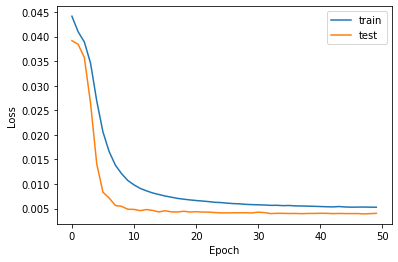

==============minmax===================
MAPE test is : 11993741993.440052
MAPE test invert is : 0.03964446440462184
==============zscore===================
MAPE test is : 0.12755494039408496
MAPE test invert is : 0.040130568554375995
RMSE Testing is : 0.063
RMSE Testing invert is : 1458.478
R2 test is : 0.8983209567382714
R2 test invert is : 0.8983209567382715


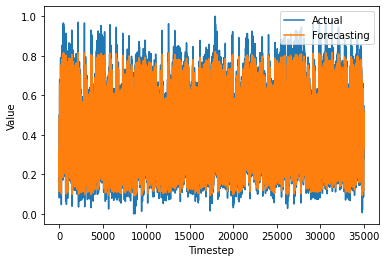

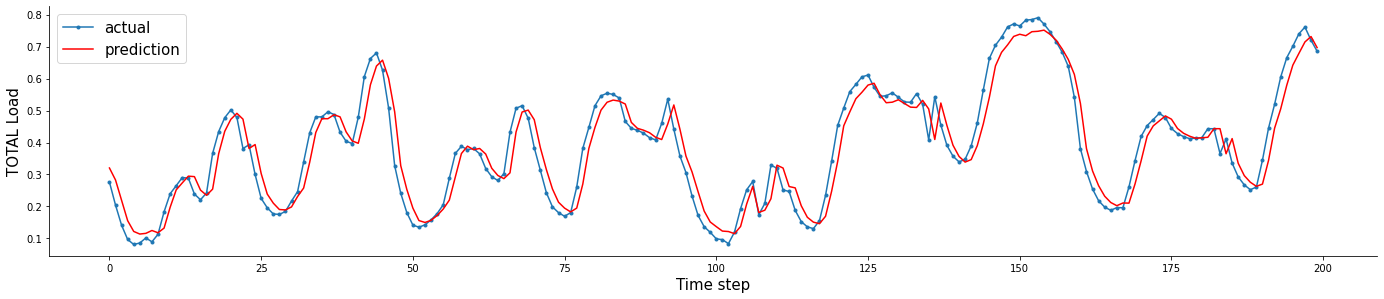

Epoch 1/50
351/351 [==============================] - 5s 6ms/step - loss: 0.0446 - val_loss: 0.0391
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0409 - val_loss: 0.0382
Epoch 3/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0384 - val_loss: 0.0346
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0329 - val_loss: 0.0225
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0243 - val_loss: 0.0115
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0192 - val_loss: 0.0076
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0154 - val_loss: 0.0067
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0131 - val_loss: 0.0060
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0114 - val_loss: 0.0048
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0102 - val_loss: 0.0049

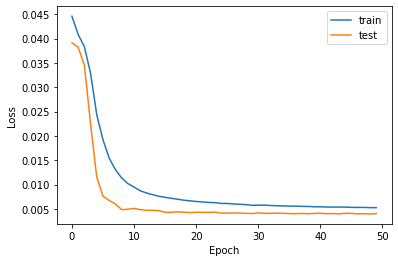

==============minmax===================
MAPE test is : 10635326688.063757
MAPE test invert is : 0.038648572579665
==============zscore===================
MAPE test is : 0.1274465570539813
MAPE test invert is : 0.03940132413506243
RMSE Testing is : 0.063
RMSE Testing invert is : 1454.893
R2 test is : 0.8988201935181879
R2 test invert is : 0.8988201935181879


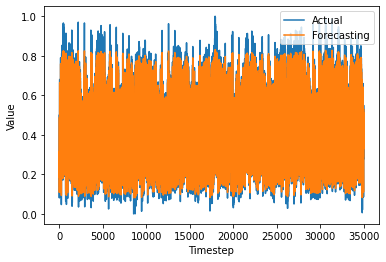

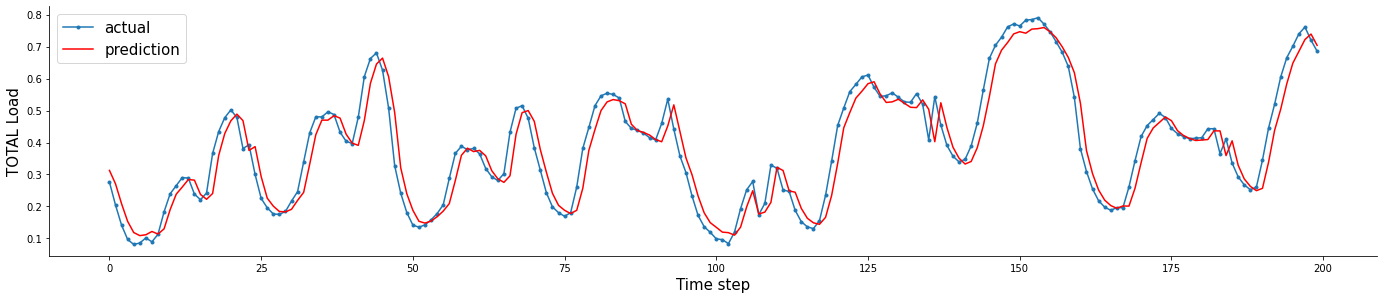

Epoch 1/50
351/351 [==============================] - 5s 9ms/step - loss: 0.0428 - val_loss: 0.0391
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0405 - val_loss: 0.0382
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0382 - val_loss: 0.0343
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0328 - val_loss: 0.0231
Epoch 5/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0250 - val_loss: 0.0116
Epoch 6/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0193 - val_loss: 0.0084
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0157 - val_loss: 0.0067
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0133 - val_loss: 0.0063
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0054
Epoch 10/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0103 - val_loss: 0.0049

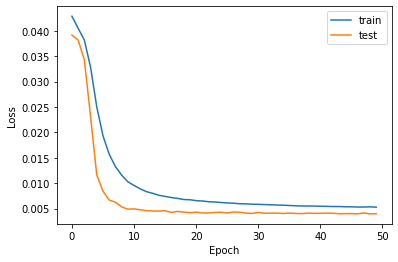

==============minmax===================
MAPE test is : 11267150747.47855
MAPE test invert is : 0.03939287421597646
==============zscore===================
MAPE test is : 0.1273182162218645
MAPE test invert is : 0.039886957684987345
RMSE Testing is : 0.063
RMSE Testing invert is : 1450.285
R2 test is : 0.8994602135480183
R2 test invert is : 0.8994602135480182


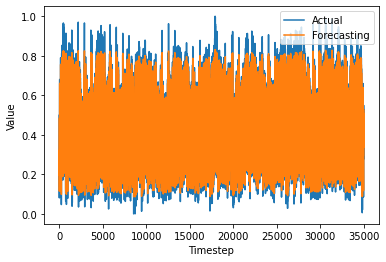

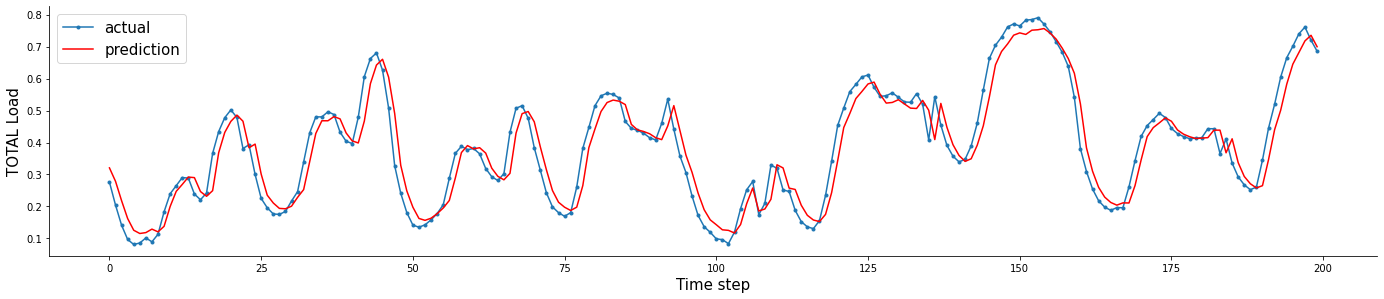

Epoch 1/50
351/351 [==============================] - 4s 6ms/step - loss: 0.0462 - val_loss: 0.0393
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0407 - val_loss: 0.0387
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0392 - val_loss: 0.0369
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0363 - val_loss: 0.0308
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0294 - val_loss: 0.0181
Epoch 6/50
351/351 [==============================] - 2s 4ms/step - loss: 0.0218 - val_loss: 0.0099
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0170 - val_loss: 0.0075
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0140 - val_loss: 0.0065
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0057
Epoch 10/50
351/351 [==============================] - 2s 5ms/step - loss: 0.0106 - val_loss: 0.0056

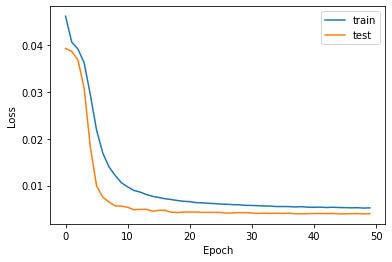

==============minmax===================
MAPE test is : 15234084049.855001
MAPE test invert is : 0.03905174677578511
==============zscore===================
MAPE test is : 0.12782535770202152
MAPE test invert is : 0.039653595579668265
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.562
R2 test is : 0.89914426577563
R2 test invert is : 0.89914426577563


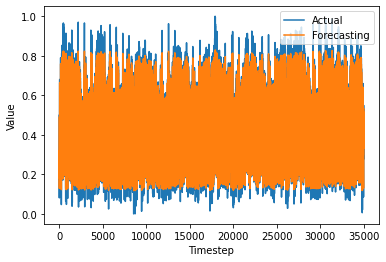

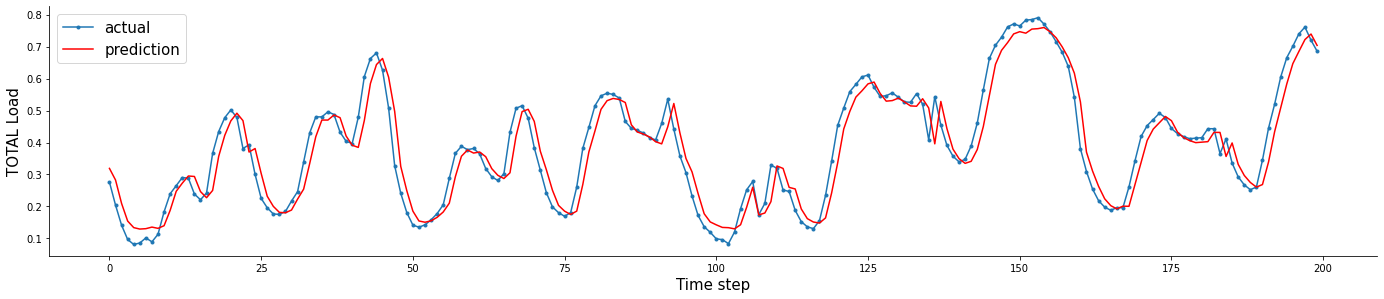

Epoch 1/50
351/351 [==============================] - 6s 12ms/step - loss: 0.0445 - val_loss: 0.0392
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0412 - val_loss: 0.0386
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0389 - val_loss: 0.0361
Epoch 4/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0350 - val_loss: 0.0270
Epoch 5/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0270 - val_loss: 0.0136
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0203 - val_loss: 0.0084
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0160 - val_loss: 0.0070
Epoch 8/50
351/351 [==============================] - 3s 7ms/step - loss: 0.0134 - val_loss: 0.0058
Epoch 9/50
351/351 [==============================] - 4s 13ms/step - loss: 0.0116 - val_loss: 0.0050
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0105 - val_loss: 0.00

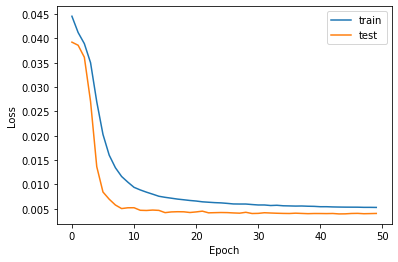

==============minmax===================
MAPE test is : 10597400258.795725
MAPE test invert is : 0.03873777565658758
==============zscore===================
MAPE test is : 0.1272559710873726
MAPE test invert is : 0.03944680647427227
RMSE Testing is : 0.063
RMSE Testing invert is : 1457.242
R2 test is : 0.8984932013252701
R2 test invert is : 0.8984932013252701


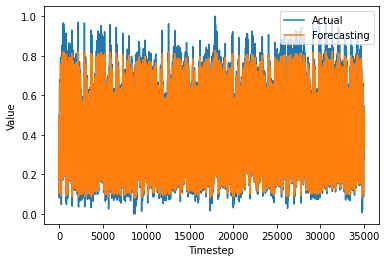

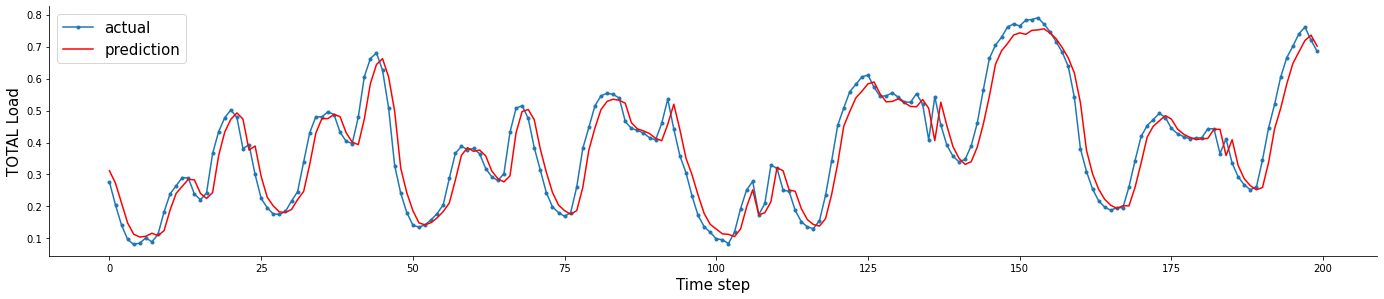

In [76]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

## sig zscore

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 1.0003 - val_loss: 0.9498
Epoch 2/50
351/351 [==============================] - 1s 4ms/step - loss: 0.7856 - val_loss: 0.6037
Epoch 3/50
351/351 [==============================] - 2s 4ms/step - loss: 0.6200 - val_loss: 0.5916
Epoch 4/50
351/351 [==============================] - 2s 4ms/step - loss: 0.6069 - val_loss: 0.5915
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.6033 - val_loss: 0.5908
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.6001 - val_loss: 0.5901
Epoch 7/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5970 - val_loss: 0.5891
Epoch 8/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5956 - val_loss: 0.5876
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5930 - val_loss: 0.5868
Epoch 10/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5917 - val_loss: 0.5864

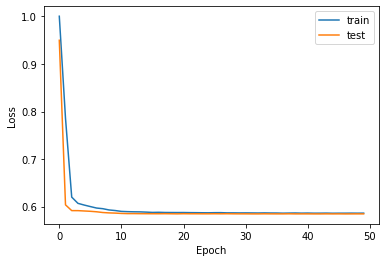

==============minmax===================
MAPE test is : 2.117554640192184
MAPE test invert is : 0.10588850630152859
==============zscore===================
MAPE test is : 94668.83902936234
MAPE test invert is : 0.090887861697197
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.374
R2 test is : 0.41498901977286684
R2 test invert is : 0.41498901977286695


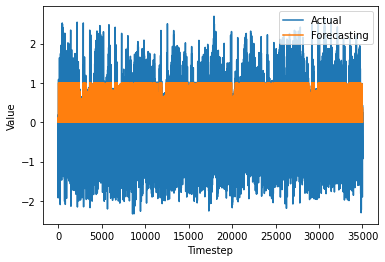

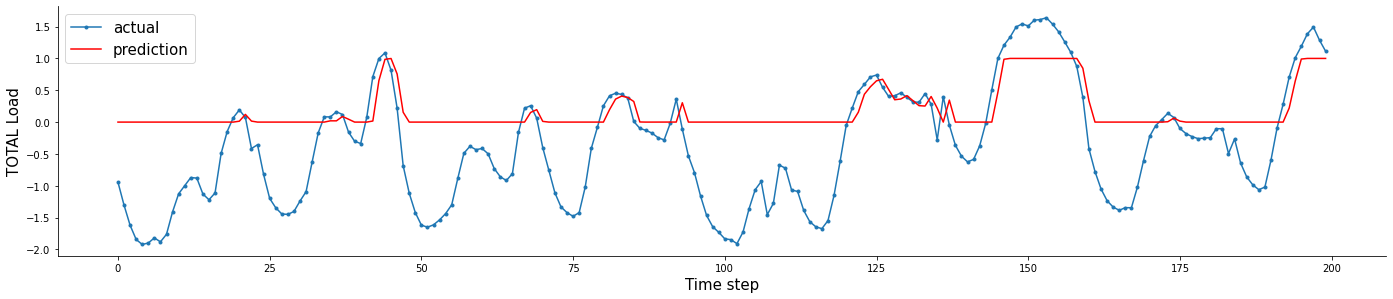

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 1.0067 - val_loss: 0.9478
Epoch 2/50
351/351 [==============================] - 2s 4ms/step - loss: 0.7926 - val_loss: 0.6110
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.6234 - val_loss: 0.5919
Epoch 4/50
351/351 [==============================] - 1s 4ms/step - loss: 0.6077 - val_loss: 0.5917
Epoch 5/50
351/351 [==============================] - 1s 4ms/step - loss: 0.6033 - val_loss: 0.5906
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5998 - val_loss: 0.5892
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5965 - val_loss: 0.5879
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5939 - val_loss: 0.5867
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5917 - val_loss: 0.5860
Epoch 10/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5912 - val_loss: 0.5857

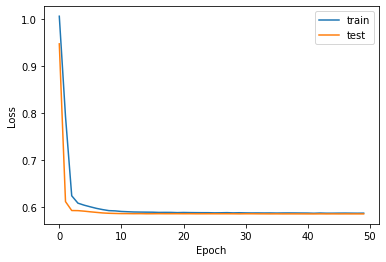

==============minmax===================
MAPE test is : 2.1241819596957323
MAPE test invert is : 0.1058875083638696
==============zscore===================
MAPE test is : 149739.3659006903
MAPE test invert is : 0.09089612552673786
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.300
R2 test is : 0.4150138104597334
R2 test invert is : 0.4150138104597335


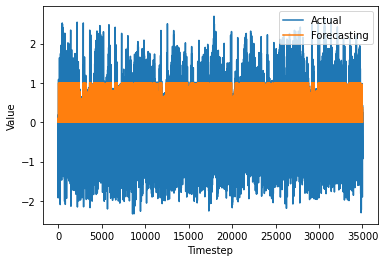

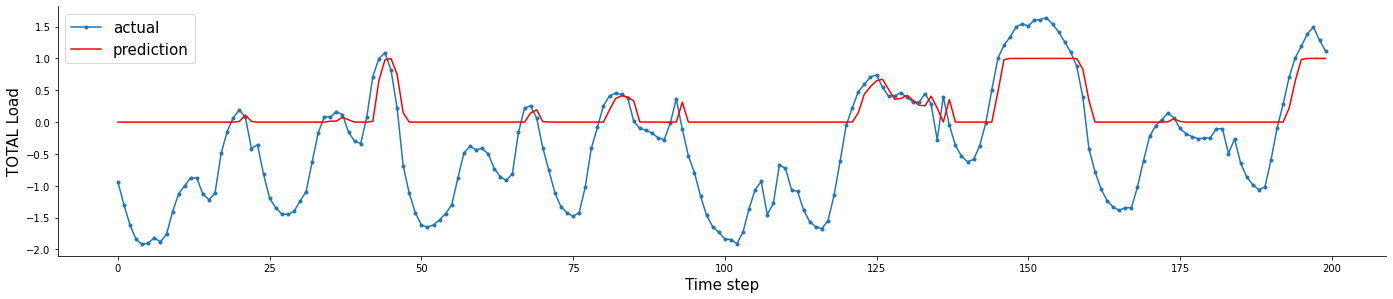

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 1.0108 - val_loss: 0.9791
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.8510 - val_loss: 0.6452
Epoch 3/50
351/351 [==============================] - 2s 4ms/step - loss: 0.6353 - val_loss: 0.5934
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6099 - val_loss: 0.5930
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.6052 - val_loss: 0.5918
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.6014 - val_loss: 0.5906
Epoch 7/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5983 - val_loss: 0.5893
Epoch 8/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5963 - val_loss: 0.5880
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5939 - val_loss: 0.5869
Epoch 10/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5915 - val_loss: 0.5859

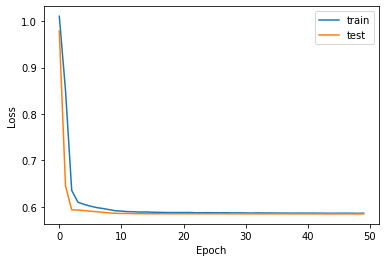

==============minmax===================
MAPE test is : 2.119954425979494
MAPE test invert is : 0.1058706331627659
==============zscore===================
MAPE test is : 233589.08775945063
MAPE test invert is : 0.0908723056987448
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.196
R2 test is : 0.41504846392366235
R2 test invert is : 0.41504846392366246


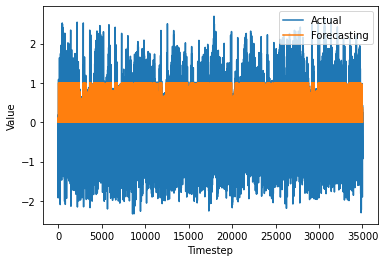

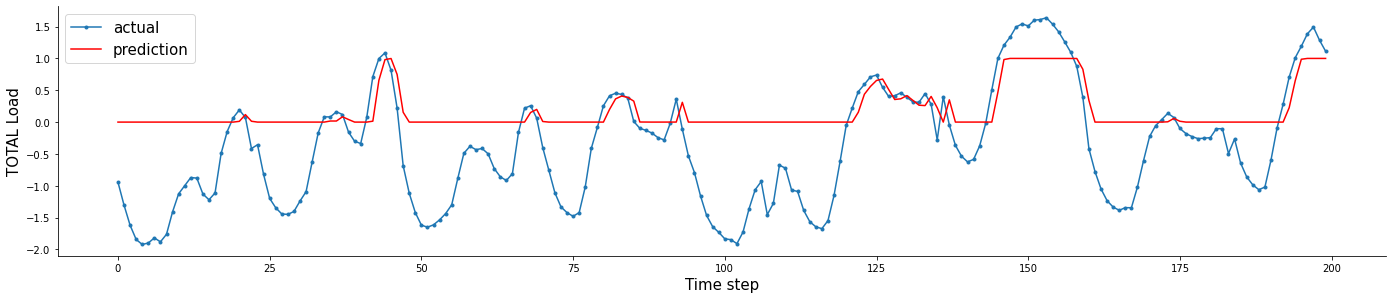

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 1.0210 - val_loss: 0.9551
Epoch 2/50
351/351 [==============================] - 2s 4ms/step - loss: 0.8202 - val_loss: 0.6351
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.6313 - val_loss: 0.5931
Epoch 4/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6096 - val_loss: 0.5923
Epoch 5/50
351/351 [==============================] - 2s 4ms/step - loss: 0.6046 - val_loss: 0.5910
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.6017 - val_loss: 0.5900
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5980 - val_loss: 0.5885
Epoch 8/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5952 - val_loss: 0.5871
Epoch 9/50
351/351 [==============================] - 2s 4ms/step - loss: 0.5932 - val_loss: 0.5863
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5917 - val_loss: 0.5856

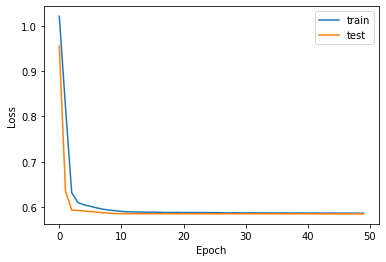

==============minmax===================
MAPE test is : 2.122039837226813
MAPE test invert is : 0.10589937746401655
==============zscore===================
MAPE test is : 327604.43249980785
MAPE test invert is : 0.0909014352987372
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.413
R2 test is : 0.41497613678321443
R2 test invert is : 0.41497613678321454


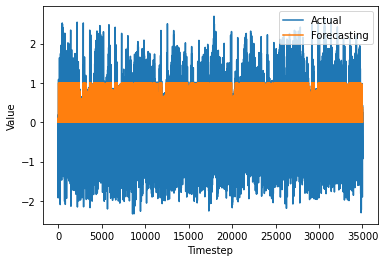

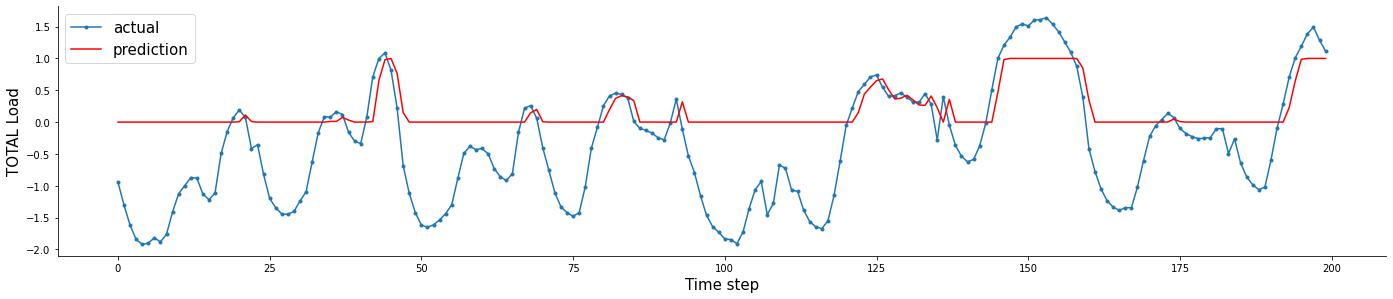

Epoch 1/50
351/351 [==============================] - 3s 5ms/step - loss: 1.0328 - val_loss: 0.9735
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.8426 - val_loss: 0.6421
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.6325 - val_loss: 0.5927
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6094 - val_loss: 0.5922
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6038 - val_loss: 0.5908
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.6006 - val_loss: 0.5895
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5978 - val_loss: 0.5888
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5951 - val_loss: 0.5872
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.5926 - val_loss: 0.5864
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5916 - val_loss: 0.5857

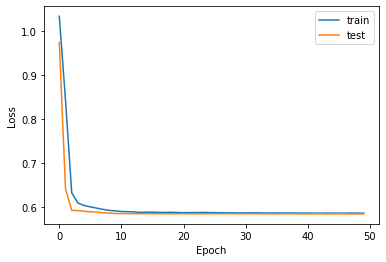

==============minmax===================
MAPE test is : 2.150860957924235
MAPE test invert is : 0.10587209262191788
==============zscore===================
MAPE test is : 223401.29668450748
MAPE test invert is : 0.0908663269205997
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.168
R2 test is : 0.4150578416853572
R2 test invert is : 0.4150578416853574


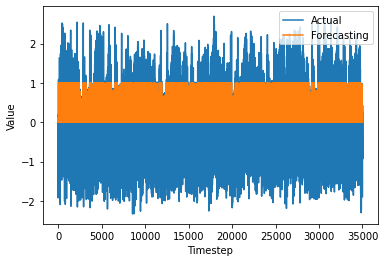

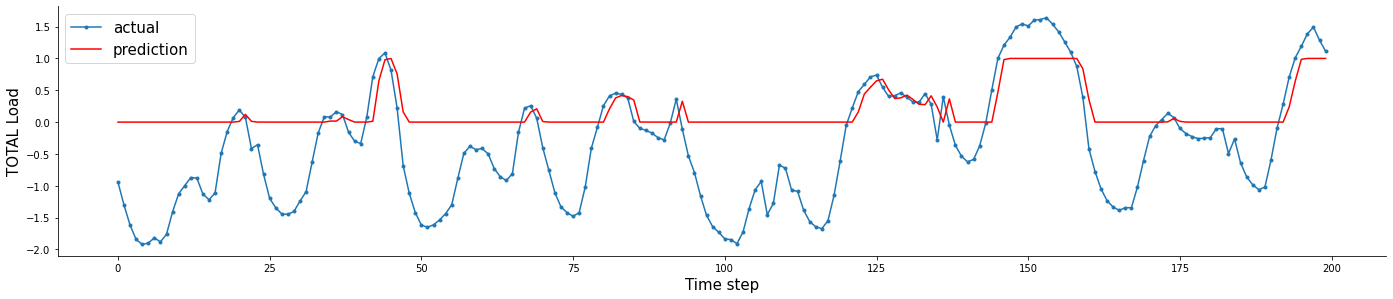

In [54]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

# 5 run random

## tanh zscore

Epoch 1/91
351/351 [==============================] - 5s 9ms/step - loss: 0.6268 - val_loss: 0.5872
Epoch 2/91
351/351 [==============================] - 3s 10ms/step - loss: 0.5912 - val_loss: 0.5864
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5897 - val_loss: 0.5866
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5895 - val_loss: 0.5862
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5895 - val_loss: 0.5871
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5886 - val_loss: 0.5867
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5887 - val_loss: 0.5860
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5885 - val_loss: 0.5868
Epoch 9/91
351/351 [==============================] - 3s 7ms/step - loss: 0.5884 - val_loss: 0.5858
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5884 - val_loss: 0.586

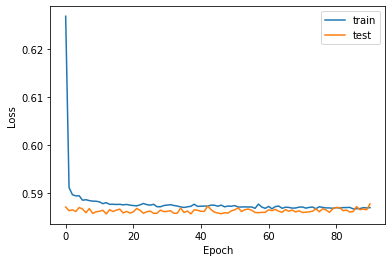

==============minmax===================
MAPE test is : 2.548163101261533
MAPE test invert is : 0.10619558100291247
==============zscore===================
MAPE test is : 1495596454545159.2
MAPE test invert is : 0.09107414928927864
RMSE Testing is : 0.765
RMSE Testing invert is : 3501.495
R2 test is : 0.41394479960491604
R2 test invert is : 0.41394479960491604


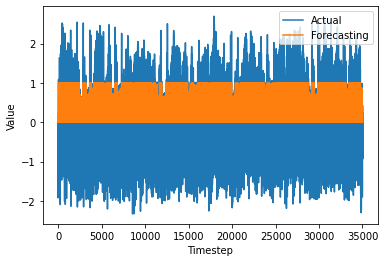

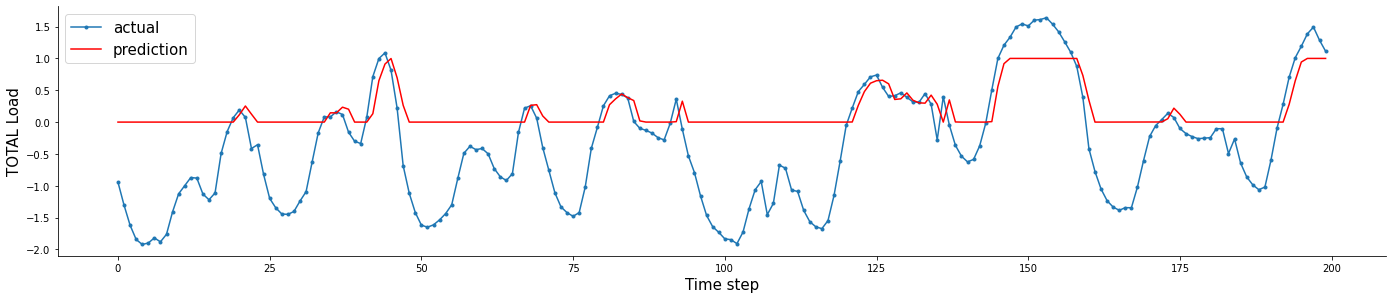

Epoch 1/91
351/351 [==============================] - 6s 12ms/step - loss: 0.6374 - val_loss: 0.5887
Epoch 2/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5906 - val_loss: 0.5871
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5897 - val_loss: 0.5876
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5889 - val_loss: 0.5886
Epoch 5/91
351/351 [==============================] - 4s 10ms/step - loss: 0.5886 - val_loss: 0.5865
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5883 - val_loss: 0.5867
Epoch 7/91
351/351 [==============================] - 3s 7ms/step - loss: 0.5888 - val_loss: 0.5869
Epoch 8/91
351/351 [==============================] - 3s 7ms/step - loss: 0.5881 - val_loss: 0.5866
Epoch 9/91
351/351 [==============================] - 4s 10ms/step - loss: 0.5880 - val_loss: 0.5857
Epoch 10/91
351/351 [==============================] - 3s 10ms/step - loss: 0.5882 - val_loss: 0.

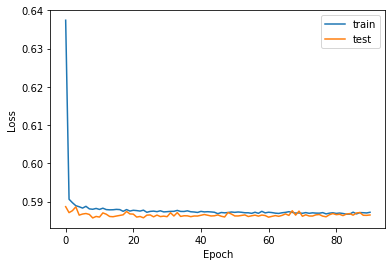

==============minmax===================
MAPE test is : 2.384715571441367
MAPE test invert is : 0.1059815470304951
==============zscore===================
MAPE test is : 1740676596139829.0
MAPE test invert is : 0.0908951168381209
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.133
R2 test is : 0.414735059292353
R2 test invert is : 0.4147350592923529


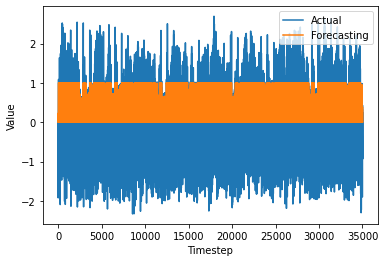

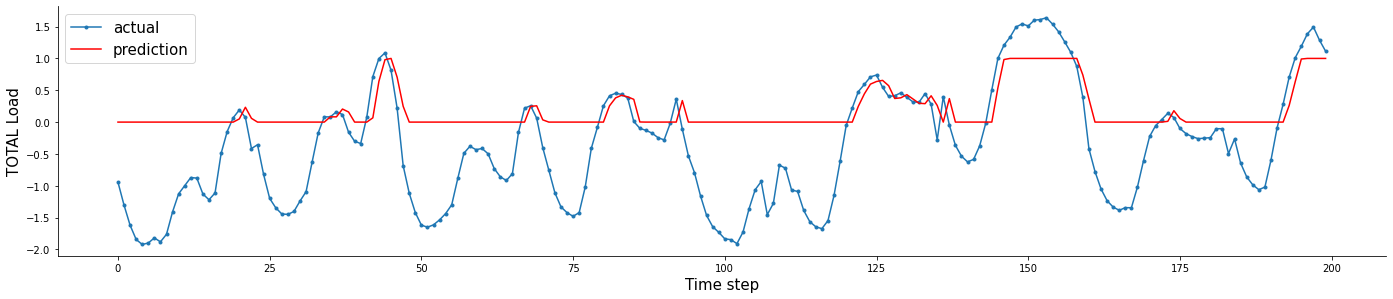

Epoch 1/91
351/351 [==============================] - 6s 12ms/step - loss: 0.6421 - val_loss: 0.5879
Epoch 2/91
351/351 [==============================] - 4s 12ms/step - loss: 0.5908 - val_loss: 0.5885
Epoch 3/91
351/351 [==============================] - 5s 14ms/step - loss: 0.5901 - val_loss: 0.5881
Epoch 4/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5893 - val_loss: 0.5862
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5892 - val_loss: 0.5865
Epoch 6/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5887 - val_loss: 0.5891
Epoch 7/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5886 - val_loss: 0.5864
Epoch 8/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5884 - val_loss: 0.5875
Epoch 9/91
351/351 [==============================] - 3s 10ms/step - loss: 0.5883 - val_loss: 0.5865
Epoch 10/91
351/351 [==============================] - 5s 14ms/step - loss: 0.5881 - val_loss

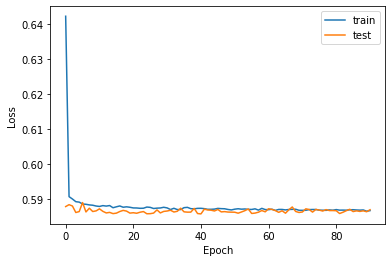

==============minmax===================
MAPE test is : 2.451690066254649
MAPE test invert is : 0.10606829676527132
==============zscore===================
MAPE test is : 1781615901721403.0
MAPE test invert is : 0.09096308617269658
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.186
R2 test is : 0.41438302044853437
R2 test invert is : 0.41438302044853437


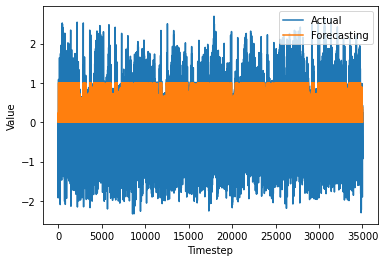

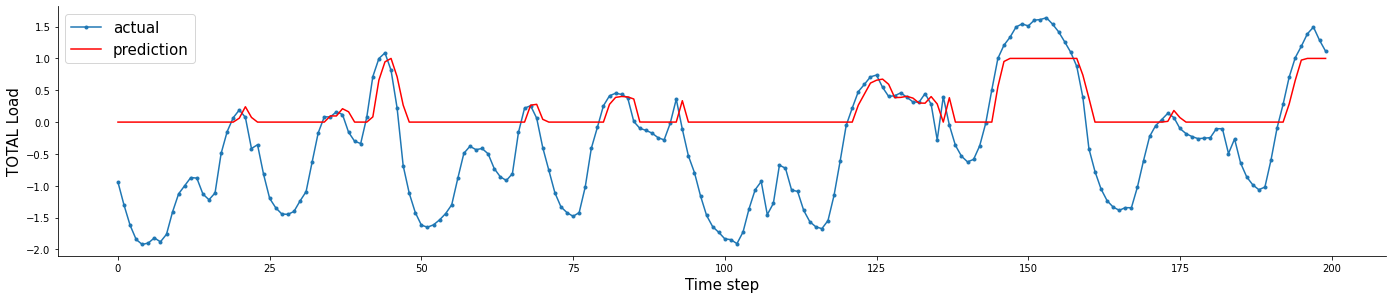

Epoch 1/91
351/351 [==============================] - 6s 11ms/step - loss: 0.6366 - val_loss: 0.5875
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5914 - val_loss: 0.5879
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5900 - val_loss: 0.5863
Epoch 4/91
351/351 [==============================] - 4s 10ms/step - loss: 0.5895 - val_loss: 0.5864
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5890 - val_loss: 0.5863
Epoch 6/91
351/351 [==============================] - 4s 12ms/step - loss: 0.5887 - val_loss: 0.5867
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5885 - val_loss: 0.5858
Epoch 8/91
351/351 [==============================] - 4s 12ms/step - loss: 0.5885 - val_loss: 0.5861
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5883 - val_loss: 0.5861
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5882 - val_loss: 0.

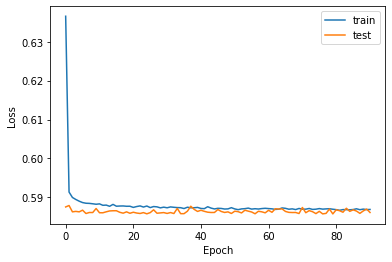

==============minmax===================
MAPE test is : 2.2931813693297367
MAPE test invert is : 0.10592633439524207
==============zscore===================
MAPE test is : 1785253116362098.2
MAPE test invert is : 0.09083834595508031
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.819
R2 test is : 0.4148403956329936
R2 test invert is : 0.4148403956329936


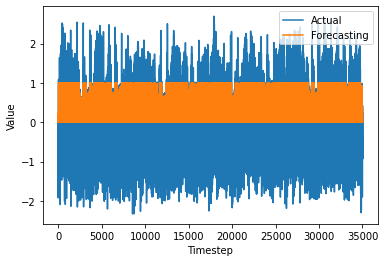

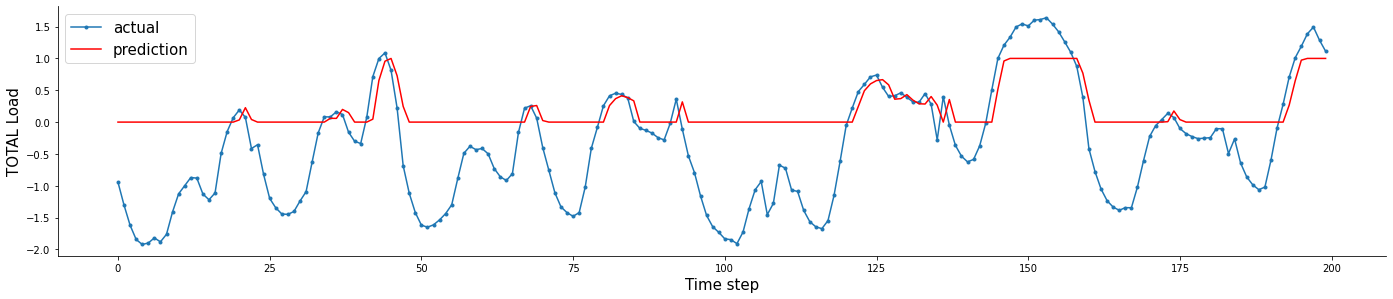

Epoch 1/91
351/351 [==============================] - 6s 9ms/step - loss: 0.6409 - val_loss: 0.5876
Epoch 2/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5910 - val_loss: 0.5868
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5900 - val_loss: 0.5883
Epoch 4/91
351/351 [==============================] - 4s 10ms/step - loss: 0.5890 - val_loss: 0.5870
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5886 - val_loss: 0.5875
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5887 - val_loss: 0.5874
Epoch 7/91
351/351 [==============================] - 4s 10ms/step - loss: 0.5882 - val_loss: 0.5877
Epoch 8/91
351/351 [==============================] - 3s 9ms/step - loss: 0.5886 - val_loss: 0.5868
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5884 - val_loss: 0.5866
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.5885 - val_loss: 0.58

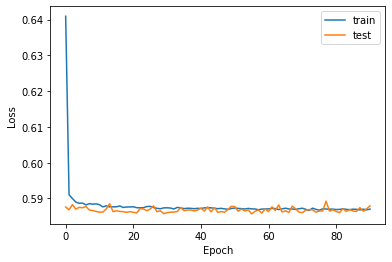

==============minmax===================
MAPE test is : 2.302693775851399
MAPE test invert is : 0.1061354608907358
==============zscore===================
MAPE test is : 1707240766444070.2
MAPE test invert is : 0.09114373735664366
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.471
R2 test is : 0.4142873983769445
R2 test invert is : 0.4142873983769444


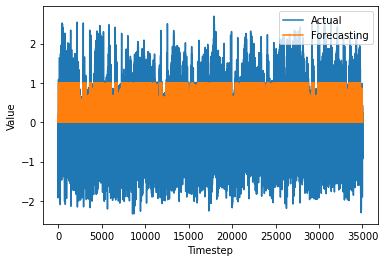

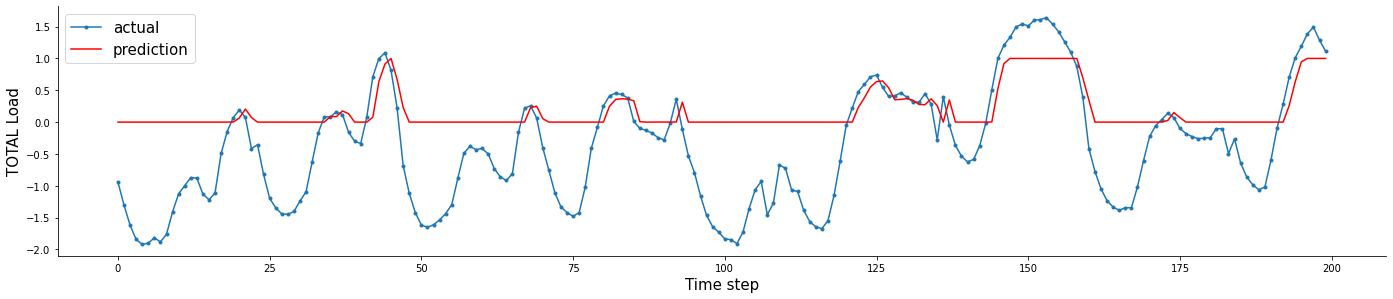

In [55]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=51, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

## tanh minmax

Epoch 1/91
351/351 [==============================] - 8s 13ms/step - loss: 0.0868 - val_loss: 0.1114
Epoch 2/91
351/351 [==============================] - 4s 12ms/step - loss: 0.0628 - val_loss: 0.1129
Epoch 3/91
351/351 [==============================] - 4s 12ms/step - loss: 0.0601 - val_loss: 0.1135
Epoch 4/91
351/351 [==============================] - 5s 14ms/step - loss: 0.0585 - val_loss: 0.1103
Epoch 5/91
351/351 [==============================] - 4s 10ms/step - loss: 0.0577 - val_loss: 0.1052
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0573 - val_loss: 0.1115
Epoch 7/91
351/351 [==============================] - 5s 13ms/step - loss: 0.0567 - val_loss: 0.0975
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0562 - val_loss: 0.0892
Epoch 9/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0557 - val_loss: 0.1160
Epoch 10/91
351/351 [==============================] - 4s 11ms/step - loss: 0.0557 - val_loss:

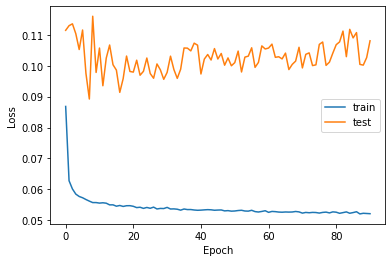

==============minmax===================
MAPE test is : 12913911781.962084
MAPE test invert is : 0.08120004874365548
==============zscore===================
MAPE test is : 0.29469515235819416
MAPE test invert is : 0.09136252822682077
RMSE Testing is : 0.132
RMSE Testing invert is : 3034.348
R2 test is : 0.5598889765105749
R2 test invert is : 0.5598889765105748


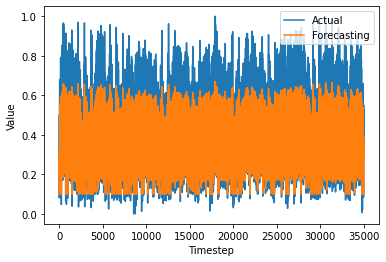

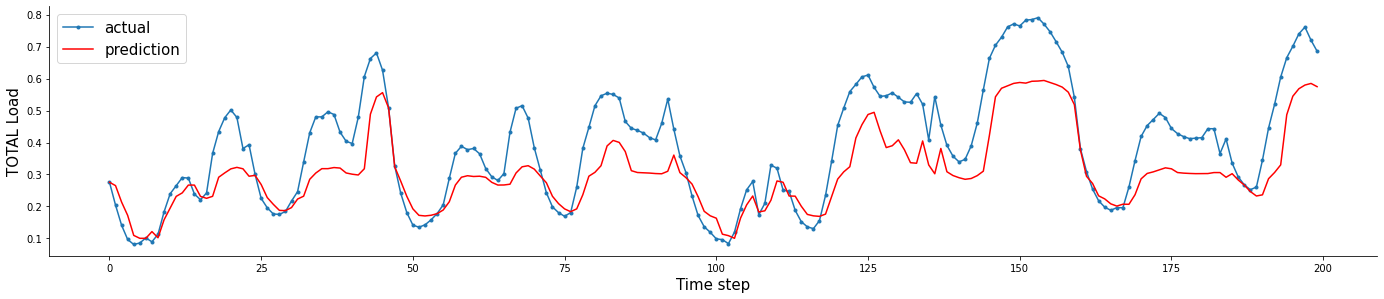

Epoch 1/91
351/351 [==============================] - 7s 9ms/step - loss: 0.0837 - val_loss: 0.0926
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.0616 - val_loss: 0.0942
Epoch 3/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0587 - val_loss: 0.0986
Epoch 4/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0578 - val_loss: 0.0917
Epoch 5/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0574 - val_loss: 0.0926
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0565 - val_loss: 0.0991
Epoch 7/91
351/351 [==============================] - 3s 7ms/step - loss: 0.0562 - val_loss: 0.0987
Epoch 8/91
351/351 [==============================] - 3s 7ms/step - loss: 0.0562 - val_loss: 0.0947
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0558 - val_loss: 0.0985
Epoch 10/91
351/351 [==============================] - 3s 10ms/step - loss: 0.0557 - val_loss: 0.09

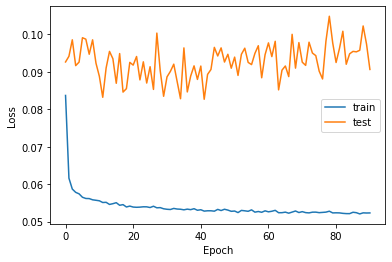

==============minmax===================
MAPE test is : 13448932670.989807
MAPE test invert is : 0.0692740752564938
==============zscore===================
MAPE test is : 0.2305443715681149
MAPE test invert is : 0.07492803818593105
RMSE Testing is : 0.110
RMSE Testing invert is : 2526.452
R2 test is : 0.6948920497979797
R2 test invert is : 0.6948920497979797


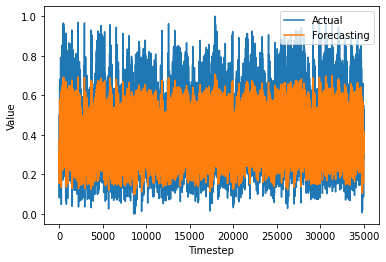

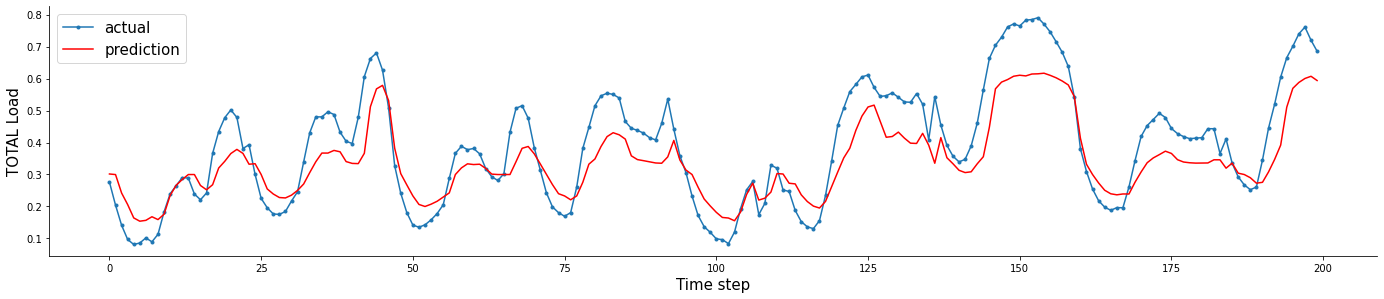

Epoch 1/91
351/351 [==============================] - 6s 11ms/step - loss: 0.0839 - val_loss: 0.1335
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0627 - val_loss: 0.1021
Epoch 3/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0594 - val_loss: 0.0877
Epoch 4/91
351/351 [==============================] - 4s 13ms/step - loss: 0.0584 - val_loss: 0.0837
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0576 - val_loss: 0.1035
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0570 - val_loss: 0.1066
Epoch 7/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0569 - val_loss: 0.0986
Epoch 8/91
351/351 [==============================] - 3s 10ms/step - loss: 0.0563 - val_loss: 0.0987
Epoch 9/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0561 - val_loss: 0.1001
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0558 - val_loss: 0.1

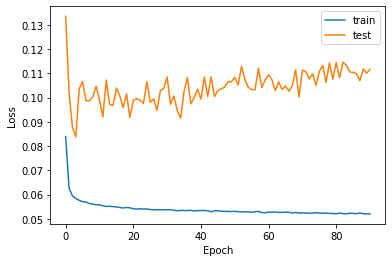

==============minmax===================
MAPE test is : 12558716000.46305
MAPE test invert is : 0.08483221965029542
==============zscore===================
MAPE test is : 0.3184280123913332
MAPE test invert is : 0.09554971065153715
RMSE Testing is : 0.134
RMSE Testing invert is : 3086.286
R2 test is : 0.5446934363398869
R2 test invert is : 0.5446934363398868


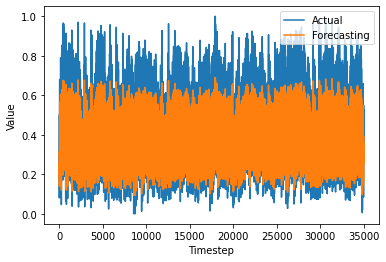

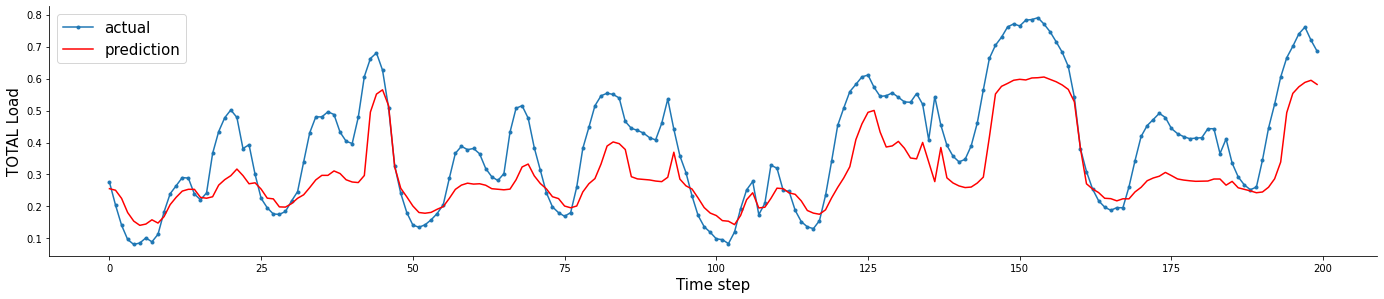

Epoch 1/91
351/351 [==============================] - 6s 11ms/step - loss: 0.0882 - val_loss: 0.0940
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0627 - val_loss: 0.1192
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0592 - val_loss: 0.0957
Epoch 4/91
351/351 [==============================] - 4s 11ms/step - loss: 0.0578 - val_loss: 0.0934
Epoch 5/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0569 - val_loss: 0.1116
Epoch 6/91
351/351 [==============================] - 3s 8ms/step - loss: 0.0565 - val_loss: 0.1086
Epoch 7/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0561 - val_loss: 0.0971
Epoch 8/91
351/351 [==============================] - 4s 13ms/step - loss: 0.0557 - val_loss: 0.0967
Epoch 9/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0555 - val_loss: 0.0922
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.0554 - val_loss: 0.0

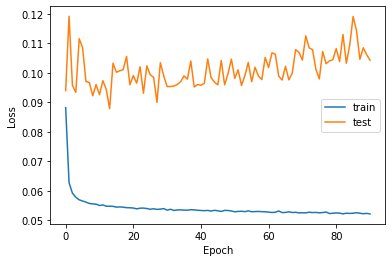

==============minmax===================
MAPE test is : 14091729379.54528
MAPE test invert is : 0.07894439921286636
==============zscore===================
MAPE test is : 0.29028670374666793
MAPE test invert is : 0.08859308492953916
RMSE Testing is : 0.127
RMSE Testing invert is : 2920.298
R2 test is : 0.5923513981095256
R2 test invert is : 0.5923513981095256


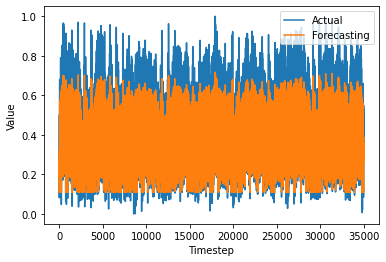

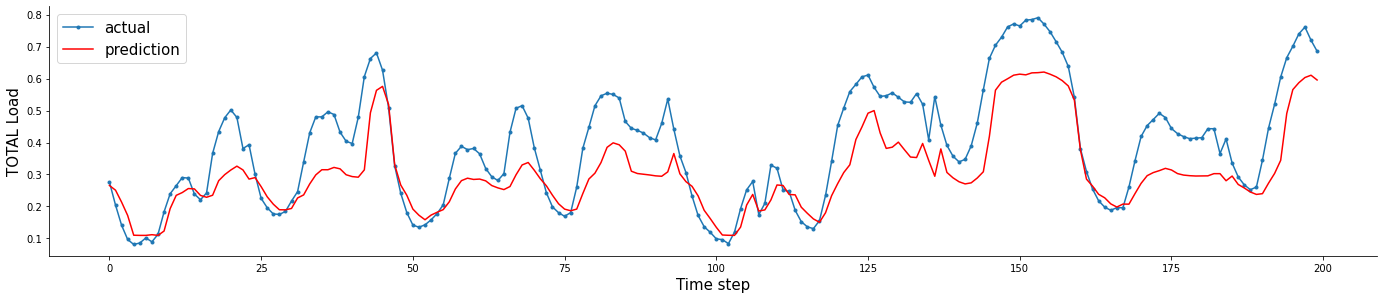

Epoch 1/91
351/351 [==============================] - 8s 13ms/step - loss: 0.0867 - val_loss: 0.1094
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.0619 - val_loss: 0.1196
Epoch 3/91
351/351 [==============================] - 3s 10ms/step - loss: 0.0592 - val_loss: 0.1174
Epoch 4/91
351/351 [==============================] - 5s 14ms/step - loss: 0.0586 - val_loss: 0.1179
Epoch 5/91
351/351 [==============================] - 5s 13ms/step - loss: 0.0578 - val_loss: 0.1102
Epoch 6/91
351/351 [==============================] - 4s 13ms/step - loss: 0.0568 - val_loss: 0.1138
Epoch 7/91
351/351 [==============================] - 5s 15ms/step - loss: 0.0567 - val_loss: 0.1118
Epoch 8/91
351/351 [==============================] - 4s 10ms/step - loss: 0.0563 - val_loss: 0.1027
Epoch 9/91
351/351 [==============================] - 4s 10ms/step - loss: 0.0561 - val_loss: 0.1087
Epoch 10/91
351/351 [==============================] - 4s 12ms/step - loss: 0.0556 - val_lo

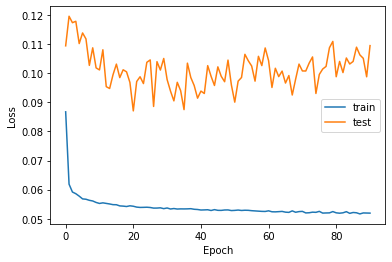

==============minmax===================
MAPE test is : 17905465443.77305
MAPE test invert is : 0.08305948463266168
==============zscore===================
MAPE test is : 0.29889359380408115
MAPE test invert is : 0.09278300608995461
RMSE Testing is : 0.132
RMSE Testing invert is : 3029.362
R2 test is : 0.561333999236413
R2 test invert is : 0.5613339992364129


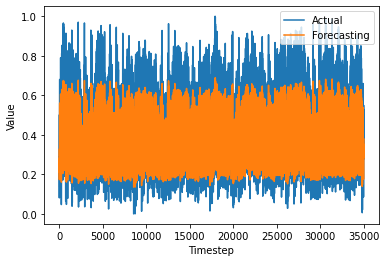

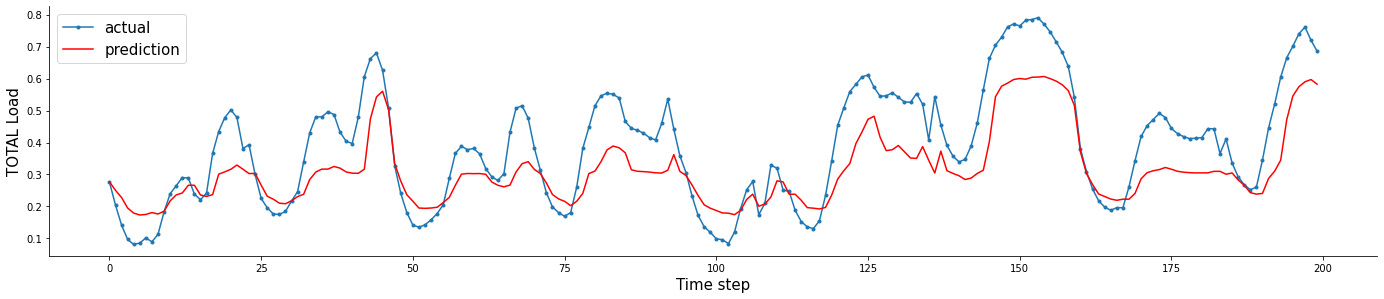

In [77]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=51, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

## sig minmax

Epoch 1/91
351/351 [==============================] - 7s 11ms/step - loss: 0.1805 - val_loss: 0.1700
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1745 - val_loss: 0.1697
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1722 - val_loss: 0.1699
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1713 - val_loss: 0.1697
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1705 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1701 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 3s 7ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 4s 11ms/step - loss: 0.1699 - val_loss: 0.16

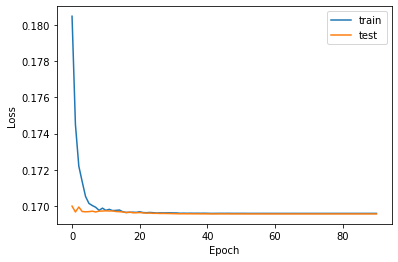

==============minmax===================
MAPE test is : 61057525164.735855
MAPE test invert is : 0.14247925491633348
==============zscore===================
MAPE test is : 0.3572715335491172
MAPE test invert is : 0.1345816798283935
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.631
R2 test is : -0.0029564501113736874
R2 test invert is : -0.0029564501113734654


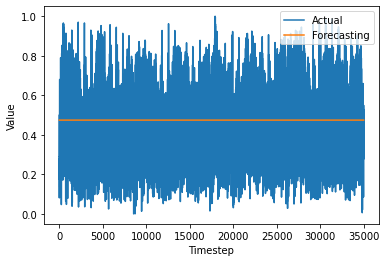

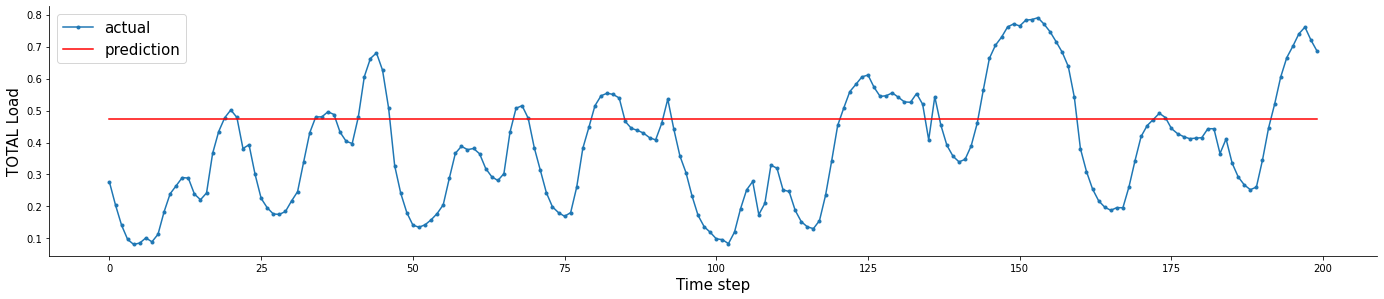

Epoch 1/91
351/351 [==============================] - 6s 11ms/step - loss: 0.1808 - val_loss: 0.1697
Epoch 2/91
351/351 [==============================] - 4s 10ms/step - loss: 0.1748 - val_loss: 0.1698
Epoch 3/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1723 - val_loss: 0.1698
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1708 - val_loss: 0.1697
Epoch 5/91
351/351 [==============================] - 4s 11ms/step - loss: 0.1703 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1701 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1700 - val_loss: 0.1696
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 3s 10ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1698 - val_loss: 0.

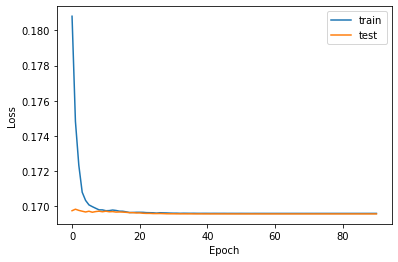

==============minmax===================
MAPE test is : 61057567341.42513
MAPE test invert is : 0.14247929338064658
==============zscore===================
MAPE test is : 0.35727129044708644
MAPE test invert is : 0.13458164619921453
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.631
R2 test is : -0.0029566291789735466
R2 test invert is : -0.0029566291789737686


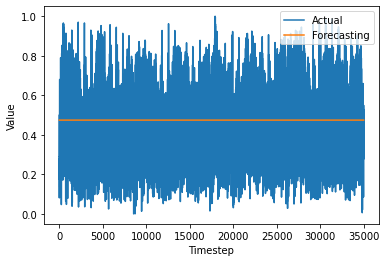

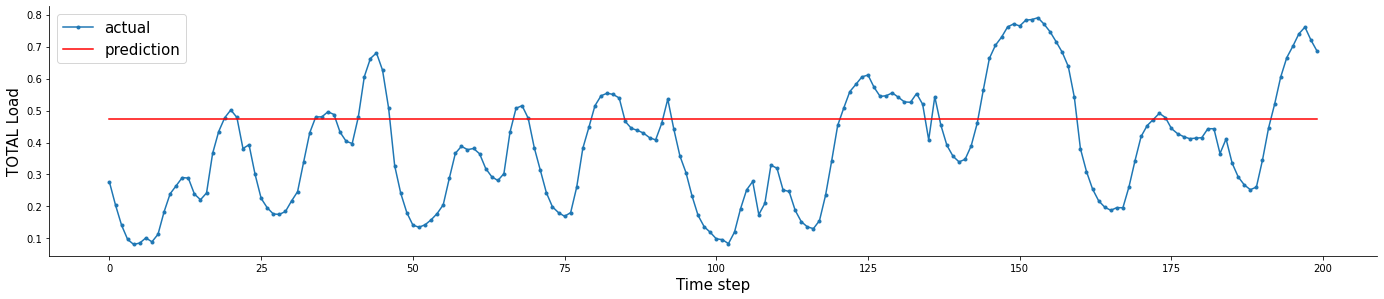

Epoch 1/91
351/351 [==============================] - 7s 11ms/step - loss: 0.1824 - val_loss: 0.1697
Epoch 2/91
351/351 [==============================] - 4s 12ms/step - loss: 0.1758 - val_loss: 0.1700
Epoch 3/91
351/351 [==============================] - 4s 12ms/step - loss: 0.1729 - val_loss: 0.1700
Epoch 4/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1716 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 4s 12ms/step - loss: 0.1708 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 4s 11ms/step - loss: 0.1703 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1702 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 5s 13ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1698 - val_loss: 

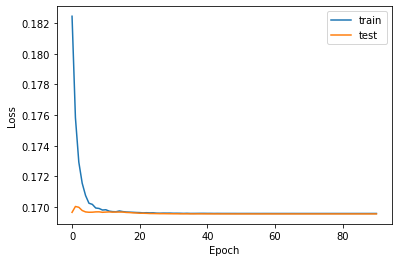

==============minmax===================
MAPE test is : 61056712304.90621
MAPE test invert is : 0.14247851416634405
==============zscore===================
MAPE test is : 0.357276220346419
MAPE test invert is : 0.13458232852003527
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.623
R2 test is : -0.0029530000497222098
R2 test invert is : -0.0029530000497219877


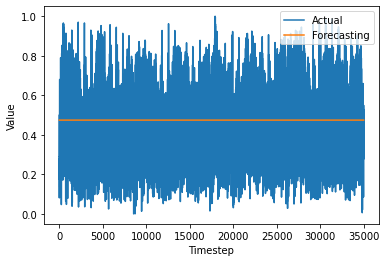

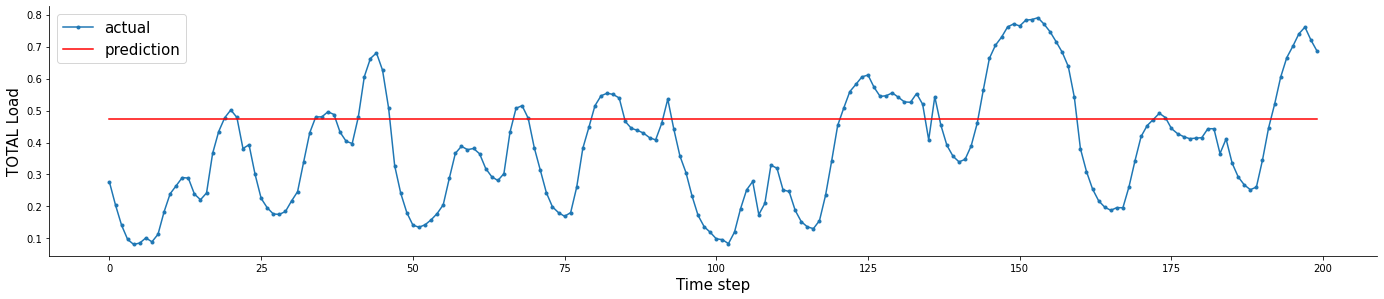

Epoch 1/91
351/351 [==============================] - 7s 13ms/step - loss: 0.1780 - val_loss: 0.1699
Epoch 2/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1732 - val_loss: 0.1698
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1718 - val_loss: 0.1697
Epoch 4/91
351/351 [==============================] - 4s 10ms/step - loss: 0.1708 - val_loss: 0.1697
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1703 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1700 - val_loss: 0.1696
Epoch 7/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1699 - val_loss: 0.1696
Epoch 8/91
351/351 [==============================] - 4s 12ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1698 - val_loss: 0.1696
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1698 - val_loss: 0.1

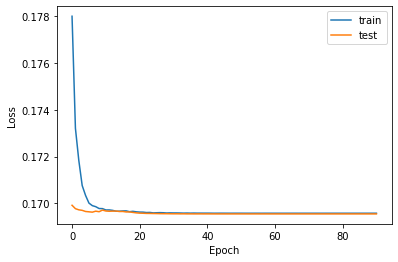

==============minmax===================
MAPE test is : 61056056649.10024
MAPE test invert is : 0.1424779166833397
==============zscore===================
MAPE test is : 0.35728000084891665
MAPE test invert is : 0.13458285177063442
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.617
R2 test is : -0.002950218684548478
R2 test invert is : -0.002950218684548478


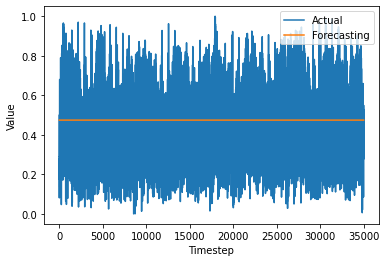

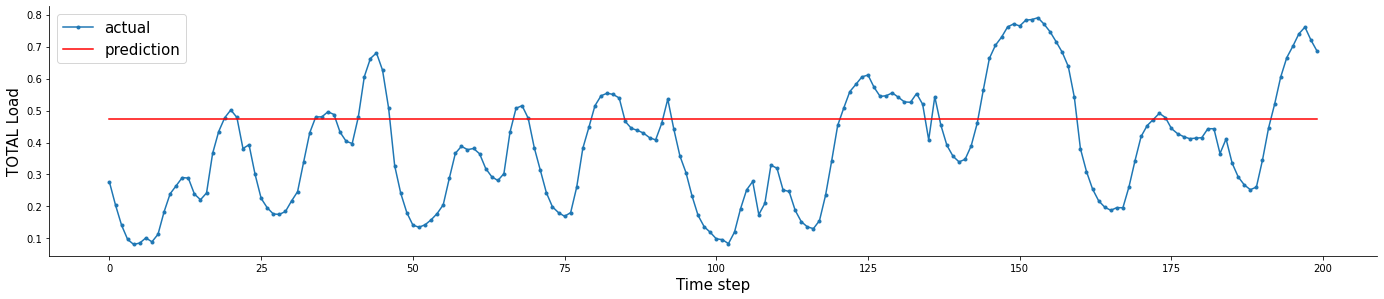

Epoch 1/91
351/351 [==============================] - 6s 10ms/step - loss: 0.1777 - val_loss: 0.1698
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.1733 - val_loss: 0.1700
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1715 - val_loss: 0.1698
Epoch 4/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1708 - val_loss: 0.1697
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.1702 - val_loss: 0.1698
Epoch 6/91
351/351 [==============================] - 4s 11ms/step - loss: 0.1701 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 4s 10ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 3s 10ms/step - loss: 0.1698 - val_loss: 0

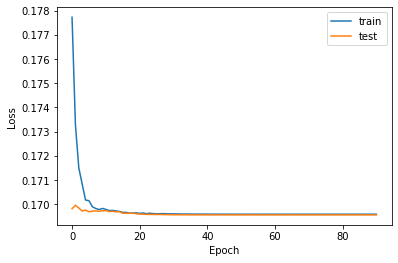

==============minmax===================
MAPE test is : 61055884108.09867
MAPE test invert is : 0.14247775945097008
==============zscore===================
MAPE test is : 0.3572809957314899
MAPE test invert is : 0.13458298946886413
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.615
R2 test is : -0.0029494869641513155
R2 test invert is : -0.0029494869641513155


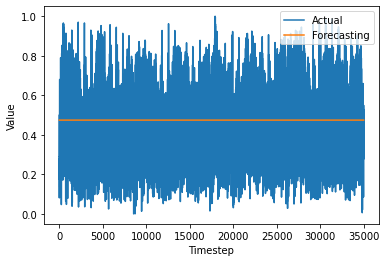

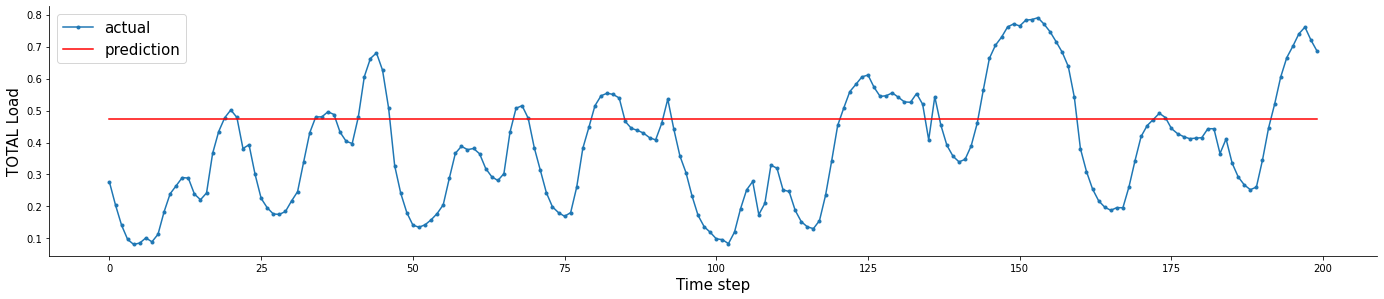

Epoch 1/91
226/351 [==================>...........] - ETA: 0s - loss: 0.1796

KeyboardInterrupt: ignored

In [78]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil
for i in range(10):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=51, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

## sig zscore

Epoch 1/91
351/351 [==============================] - 5s 8ms/step - loss: 0.8546 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8518 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 3s 10ms/step - loss: 0.8519 - val_loss: 0.8515
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8518 - val_loss: 0.8505
Epoch 5/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6739 - val_loss: 0.6298
Epoch 6/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6241 - val_loss: 0.5970
Epoch 7/91
351/351 [==============================] - 3s 10ms/step - loss: 0.6140 - val_loss: 0.5953
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6084 - val_loss: 0.5930
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6066 - val_loss: 0.5942
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6031 - val_loss: 0.59

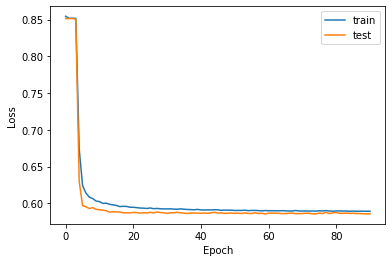

==============minmax===================
MAPE test is : 2.2430081052338964
MAPE test invert is : 0.10591745297525276
==============zscore===================
MAPE test is : 647288.3430786647
MAPE test invert is : 0.09079794689564188
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.075
R2 test is : 0.4147547377749874
R2 test invert is : 0.4147547377749875


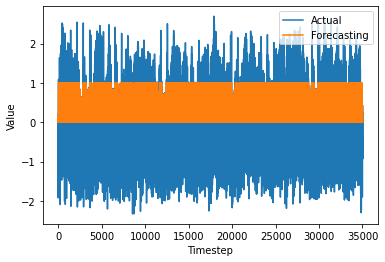

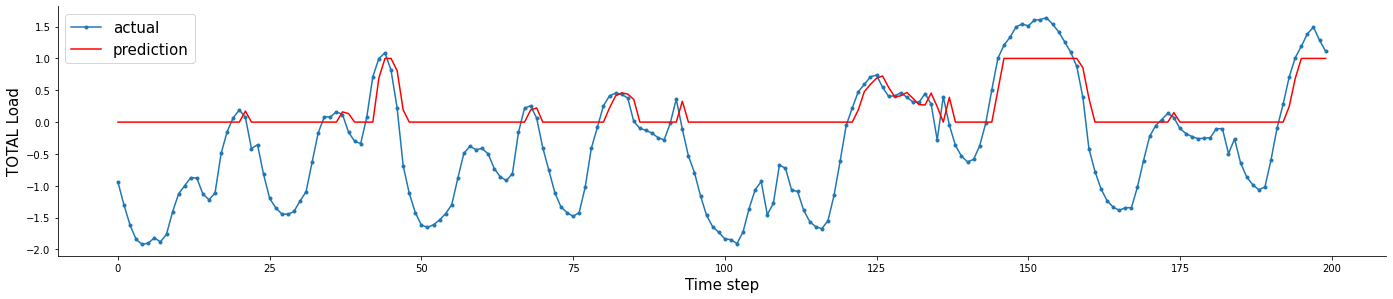

Epoch 1/91
351/351 [==============================] - 5s 10ms/step - loss: 0.8597 - val_loss: 0.8515
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.8517 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8517 - val_loss: 0.8514
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8517 - val_loss: 0.8515
Epoch 5/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8515 - val_loss: 0.8514
Epoch 6/91
351/351 [==============================] - 3s 10ms/step - loss: 0.7206 - val_loss: 0.6305
Epoch 7/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6384 - val_loss: 0.6279
Epoch 8/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6324 - val_loss: 0.6144
Epoch 9/91
351/351 [==============================] - 3s 10ms/step - loss: 0.6190 - val_loss: 0.6013
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6128 - val_loss: 0.5

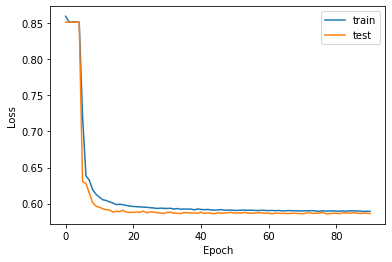

==============minmax===================
MAPE test is : 2.1624104036094196
MAPE test invert is : 0.10591420351521011
==============zscore===================
MAPE test is : 567021.0376906733
MAPE test invert is : 0.090832329729102
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.986
R2 test is : 0.4147845345089569
R2 test invert is : 0.4147845345089567


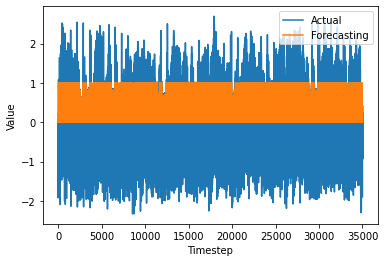

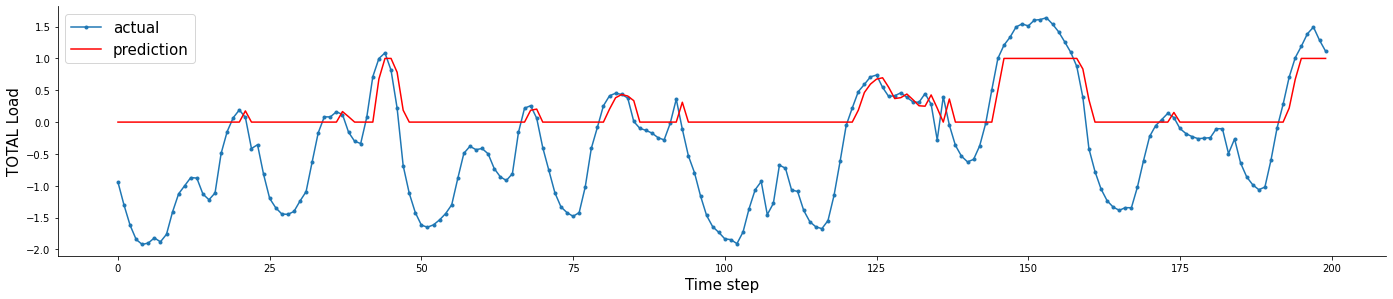

Epoch 1/91
351/351 [==============================] - 7s 12ms/step - loss: 0.8552 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.8518 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 3s 9ms/step - loss: 0.8516 - val_loss: 0.8513
Epoch 4/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6906 - val_loss: 0.6291
Epoch 5/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6367 - val_loss: 0.6266
Epoch 6/91
351/351 [==============================] - 4s 12ms/step - loss: 0.6302 - val_loss: 0.6084
Epoch 7/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6180 - val_loss: 0.5977
Epoch 8/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6134 - val_loss: 0.5959
Epoch 9/91
351/351 [==============================] - 4s 11ms/step - loss: 0.6093 - val_loss: 0.5932
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6071 - val_loss: 0.

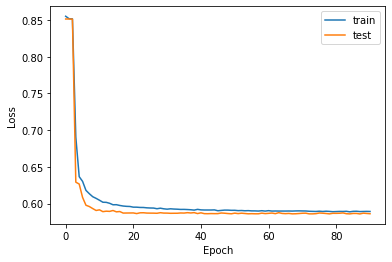

==============minmax===================
MAPE test is : 2.2414913997766477
MAPE test invert is : 0.10596037648229631
==============zscore===================
MAPE test is : 520436.27749439585
MAPE test invert is : 0.09080803804962362
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.740
R2 test is : 0.4145322818446764
R2 test invert is : 0.4145322818446763


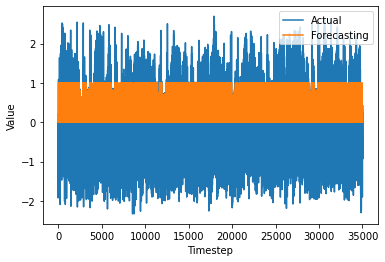

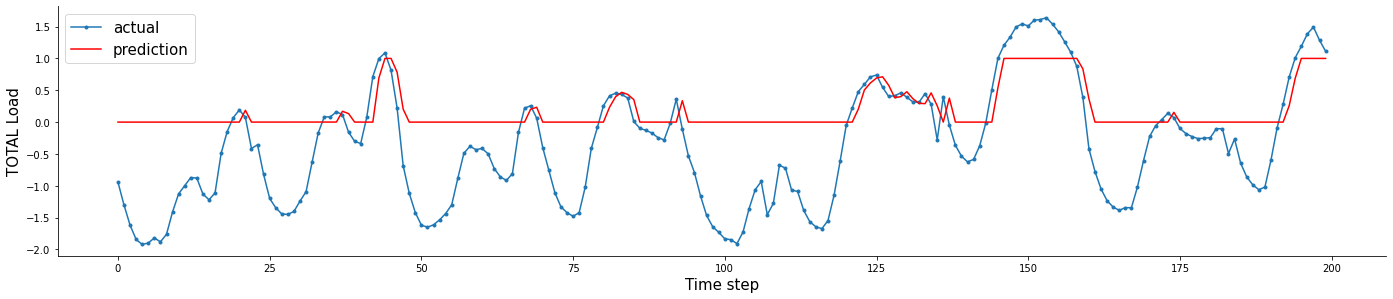

Epoch 1/91
351/351 [==============================] - 6s 11ms/step - loss: 0.8543 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 4s 12ms/step - loss: 0.8517 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 3s 9ms/step - loss: 0.8516 - val_loss: 0.8514
Epoch 4/91
351/351 [==============================] - 4s 13ms/step - loss: 0.8518 - val_loss: 0.8515
Epoch 5/91
351/351 [==============================] - 3s 10ms/step - loss: 0.8518 - val_loss: 0.8515
Epoch 6/91
351/351 [==============================] - 4s 10ms/step - loss: 0.7784 - val_loss: 0.6297
Epoch 7/91
351/351 [==============================] - 4s 12ms/step - loss: 0.6355 - val_loss: 0.6198
Epoch 8/91
351/351 [==============================] - 3s 10ms/step - loss: 0.6219 - val_loss: 0.6018
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6144 - val_loss: 0.6016
Epoch 10/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6095 - val_loss:

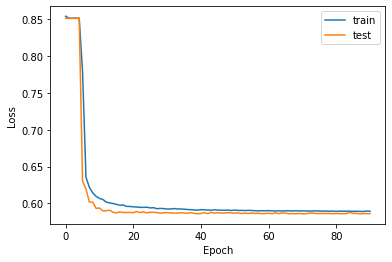

==============minmax===================
MAPE test is : 2.404757659516449
MAPE test invert is : 0.105953805129123
==============zscore===================
MAPE test is : 768013.5640702808
MAPE test invert is : 0.09080578235413808
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.410
R2 test is : 0.4146425070208989
R2 test invert is : 0.414642507020899


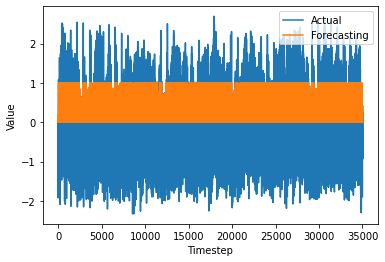

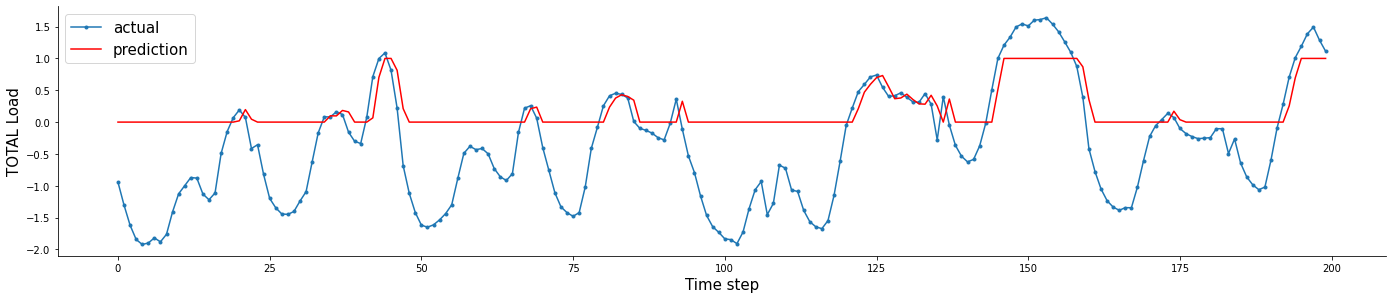

Epoch 1/91
351/351 [==============================] - 5s 9ms/step - loss: 0.8524 - val_loss: 0.8515
Epoch 2/91
351/351 [==============================] - 3s 9ms/step - loss: 0.8519 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 4s 11ms/step - loss: 0.8517 - val_loss: 0.8514
Epoch 4/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8518 - val_loss: 0.8514
Epoch 5/91
351/351 [==============================] - 3s 8ms/step - loss: 0.8095 - val_loss: 0.6346
Epoch 6/91
351/351 [==============================] - 3s 9ms/step - loss: 0.6417 - val_loss: 0.6283
Epoch 7/91
351/351 [==============================] - 3s 10ms/step - loss: 0.6336 - val_loss: 0.6255
Epoch 8/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6286 - val_loss: 0.6081
Epoch 9/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6158 - val_loss: 0.5974
Epoch 10/91
351/351 [==============================] - 3s 8ms/step - loss: 0.6096 - val_loss: 0.59

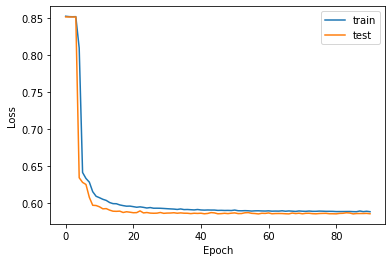

==============minmax===================
MAPE test is : 2.191761256521366
MAPE test invert is : 0.10591856134983016
==============zscore===================
MAPE test is : 326156.7784372483
MAPE test invert is : 0.09081952979473965
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.042
R2 test is : 0.4147657445481101
R2 test invert is : 0.41476574454811


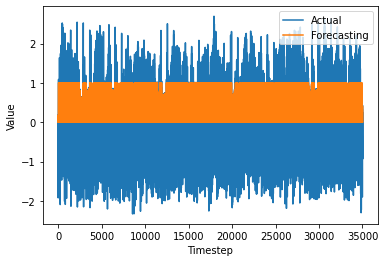

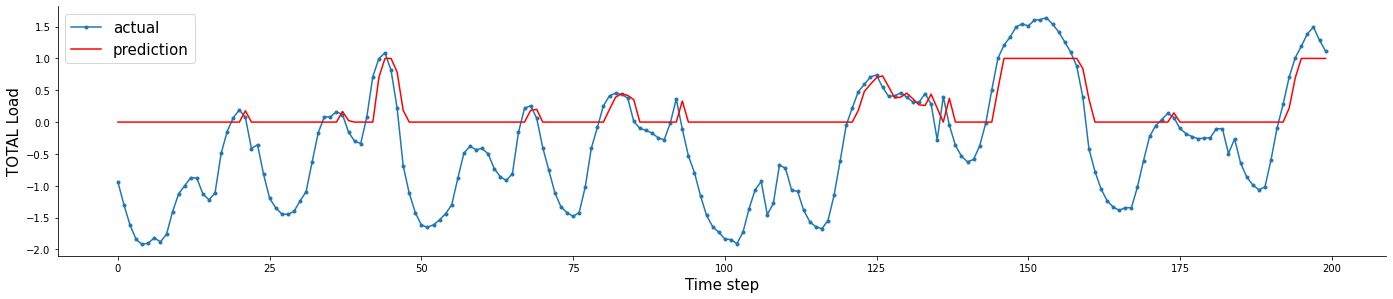

In [56]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=51, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(51, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")